# DengAI: Predicting Disease Spread

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

### Mikhail Koksharov, Irena Gureeva, Mikhail Shvetsov

## 1) Description of the problem.
Dengue fever is a mosquito-borne disease that occurs in tropical and subtropical parts of the world. Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. 

Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide. Using environmental data collected by various U.S. Federal Government agencies we have to predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru.

Our goal is to develop a prediction model that would be able to anticipate the cases of dengue in every country depending on a set of climate variables mentioned above.

## 2) Load the data using pandas and split the data frame into X (inputs) and y (outputs).

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Upload the data to different dataframes

In our case data already splitted in Inputs and outputs, train and test
### Btw there is no output test data
##### That is why we are going to ignore "features_test", as there is no matching "labels_test" . Instead we will manually split train data.

In [3]:
dengue_features_train = pd.read_csv('dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dengue_labels_train.csv')
dengue_features_test = pd.read_csv('dengue_features_test.csv')

In [4]:
# X_test = dengue_features_test
X_train = dengue_features_train
y_train = dengue_labels_train.total_cases

Here are all the input features

In [5]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i])

city
year
weekofyear
week_start_date
ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


## 3) Preparing the dataset

1. encode categorical variables (if any),
2. handle missing variables (if any),
3. generate new features (if you have some intuition that these features can be useful)
4. preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one)

#### We should take into account that we have data for two cities: San Juan and Iquitos, there are placed in different geographical places, therefore, they would have different weather conditions.

How many NaN values are in datasets:

In [6]:
print("NaN values in category 'San Juan'\n")
print (X_train.query('city == "sj"').isna().sum())
print("\n NaN values in category 'Iquitos'\n")
print (X_train.query('city == "iq"').isna().sum())

NaN values in category 'San Juan'

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c  

As we have time series data about weather condition, we may try to impute with connecting missing values to existing one. So we will use interpolation.Since weather cannot change dramatically (especially in the equatorial climat zone), if it changes it always do it gradually.

Convert data to suitable format:

In [7]:
data_date_time_train = pd.to_datetime(X_train['week_start_date'])

Create date columns 

In [8]:
X_train['year'] = pd.DatetimeIndex(data_date_time_train).year
X_train['month'] = pd.DatetimeIndex(data_date_time_train).month
X_train['day'] = pd.DatetimeIndex(data_date_time_train).day

Remove columns of no use 

In [9]:
X_train.drop(['year', 'weekofyear', 'week_start_date'], axis = 1, inplace = True)


Interpolate NaN values 

In [10]:
X_train.interpolate(method = "pad", inplace = True)


Check if any NaNs are left

In [11]:
print(X_train.isna().sum())

# print(X_test.isna().sum())

city                                     0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
month                                    0
day                                      0
dtype: int6

#### Encoding of categorical features

Let's encode the city names: Sj = 0, Iq = 1

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

cat_features_train = pd.DataFrame(ohe.fit_transform(X_train[['city']]))

# cat_features_test = pd.DataFrame(ohe.fit_transform(X_test[['city']]))

City_cat = ['San_Juan', 'Iquitos']

dummy_cols_names = [*City_cat]
cat_features_train.columns = dummy_cols_names

# cat_features_test.columns = dummy_cols_names

In [13]:
X_train = pd.concat([X_train, cat_features_train], axis=1)

# X_test = pd.concat([X_test, cat_features_test], axis=1)

In [14]:
X_train.drop(['city'], axis = 1, inplace = True)

# X_test.drop(['city'], axis = 1, inplace = True)

Now there are two columns representing data relevant to each city

In [15]:
X_train

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,day,San_Juan,Iquitos
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,30,0.0,1.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,7,0.0,1.0
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,5,14,0.0,1.0
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,5,21,0.0,1.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,5,28,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,...,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,28,1.0,0.0
1452,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,...,7.471429,27.433333,10.500000,34.7,21.7,36.6,6,4,1.0,0.0
1453,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,...,7.500000,24.400000,6.900000,32.2,19.2,7.4,6,11,1.0,0.0
1454,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,...,7.871429,25.433333,8.733333,31.2,21.0,16.0,6,18,1.0,0.0


#### New features

Let's first introduce the feature, that contains all the data connected to vegetation. Such parameter gives a mean characterisation of vegetation around the city

In [16]:
from math import sqrt, pow, log10

In [17]:
X_train['vegetation_index_total'] = X_train[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',]].apply(lambda x: sqrt(pow(x[0],2)+pow(x[1],2)+pow(x[2],2)+pow(x[3],2)), axis=1)

# X_test['vegetation_index_total'] = X_test[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',]].apply(lambda x: sqrt(pow(x[0],2)+pow(x[1],2)+pow(x[2],2)+pow(x[3],2)), axis=1)

Secondly, let's propose an additional feature, connected to ammount of moisture (fog) in air. At that condition water stops to evaporate and remains in liquid state (which is very convenient to mosquittos). Yes, we have a parameter "humidity". Why not to have an one more? :)

In [18]:
X_train['Foggy'] = X_train[['reanalysis_dew_point_temp_k',"reanalysis_min_air_temp_k"]].apply(lambda x: True if(x[0]>x[1]) else False, axis=1)

# X_test['Foggy'] = X_test[['reanalysis_dew_point_temp_k',"reanalysis_min_air_temp_k"]].apply(lambda x: True if(x[0]>x[1]) else False, axis=1)

## 4) Perform an exploratory analysis of the data via visualization with Seaborn. 

1. Try to find meaningful patterns in the data which can be used to make a machine learning task more specific or to help with selection and tuning ML models.
2. Perform additional preprocessing of your data if findings suggest this.
3. If there are several options for target variables, can select some of them after this step with a couple of sentences explaining the choice.

#### Firstly, add "total cases" to X_train in order to simplify further analisys

In [19]:
X_train['total_cases'] = y_train

#### Let's look at correlation between cases of disease and weather condition for both cities

In [20]:
X_num_train = X_train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month','vegetation_index_total',
       'Foggy','total_cases']]

San_Juan_Corr = X_num_train[0:935].corr()
Iquitos_Corr = X_num_train[936:].corr()

#### Following hystograms represent the correlation between target and different features for both cities

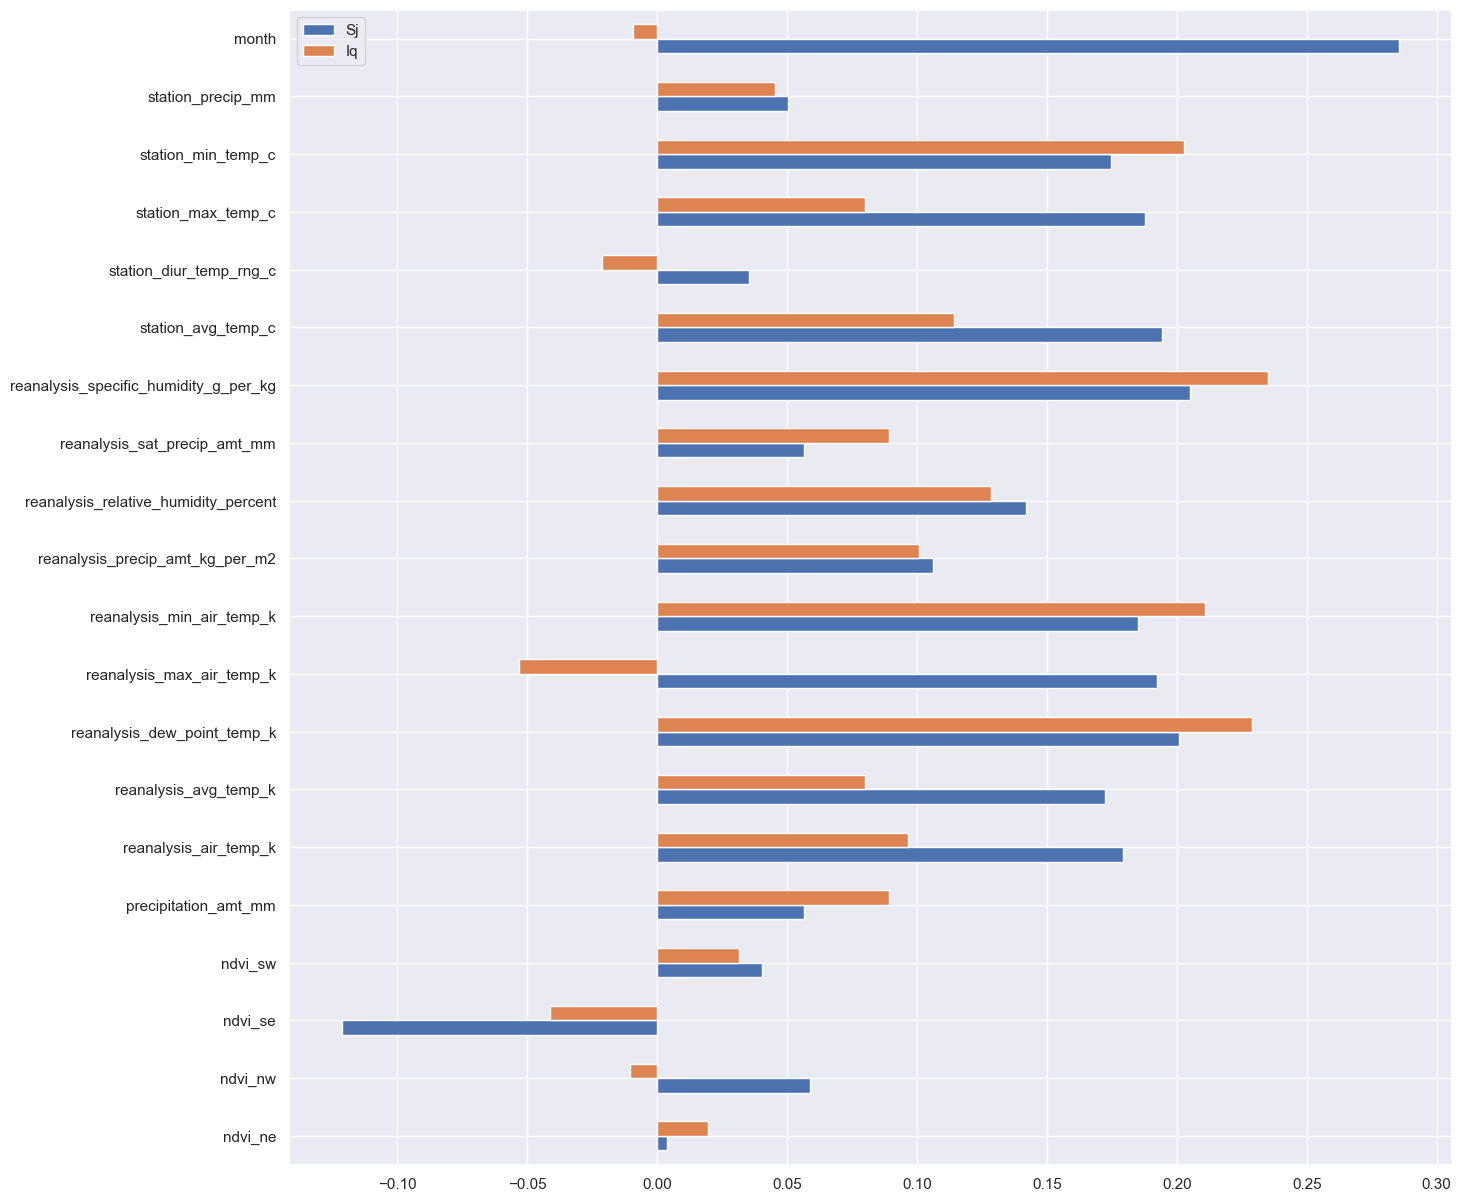

In [21]:
x = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm','reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c','station_min_temp_c', 'station_precip_mm', 'month']
df = pd.DataFrame({'Sj' : San_Juan_Corr.total_cases.drop('total_cases'),
                    'Iq' : Iquitos_Corr.total_cases.drop('total_cases')}, index =x)
ax = df.plot.barh(figsize=(15,15))

It is observed, that several parameters have a stronger correlation with target, and some weaker. Later we will drop the least correlating parameters. Indeed, some introduced parameters also have stronger or weaker correlation in different cities.
#### Analysis of San Juan:
1. main important parameter - month. Probably due to special weather at particular month due to relation climate 
2. data from reanalysis (especially - temperature) are more important, then data from local stations
3. satelite vegatatiuon data less correlated to the disease
#### Analysis of Iquitos:
1. most important parametr - humidity
2. month have almost no correlation with total cases
3. satellite navigation even less correlates to the target
#### Overall analysis
1. dew point temperature and high humidity brings more desease cases - this seems logical due to the fact that mosquitos prefer such type of weather and especially spread when there is a lot of still water
2. percepitation have less correalation to target then temp and humidity, despite the fact that rain actually brings humidity
3. there is also a timing factor - virus needs a period of time to grow inside a human and mosquitto, until the desease case is spotted.

##### Here is a timeline of deseases in San Juan

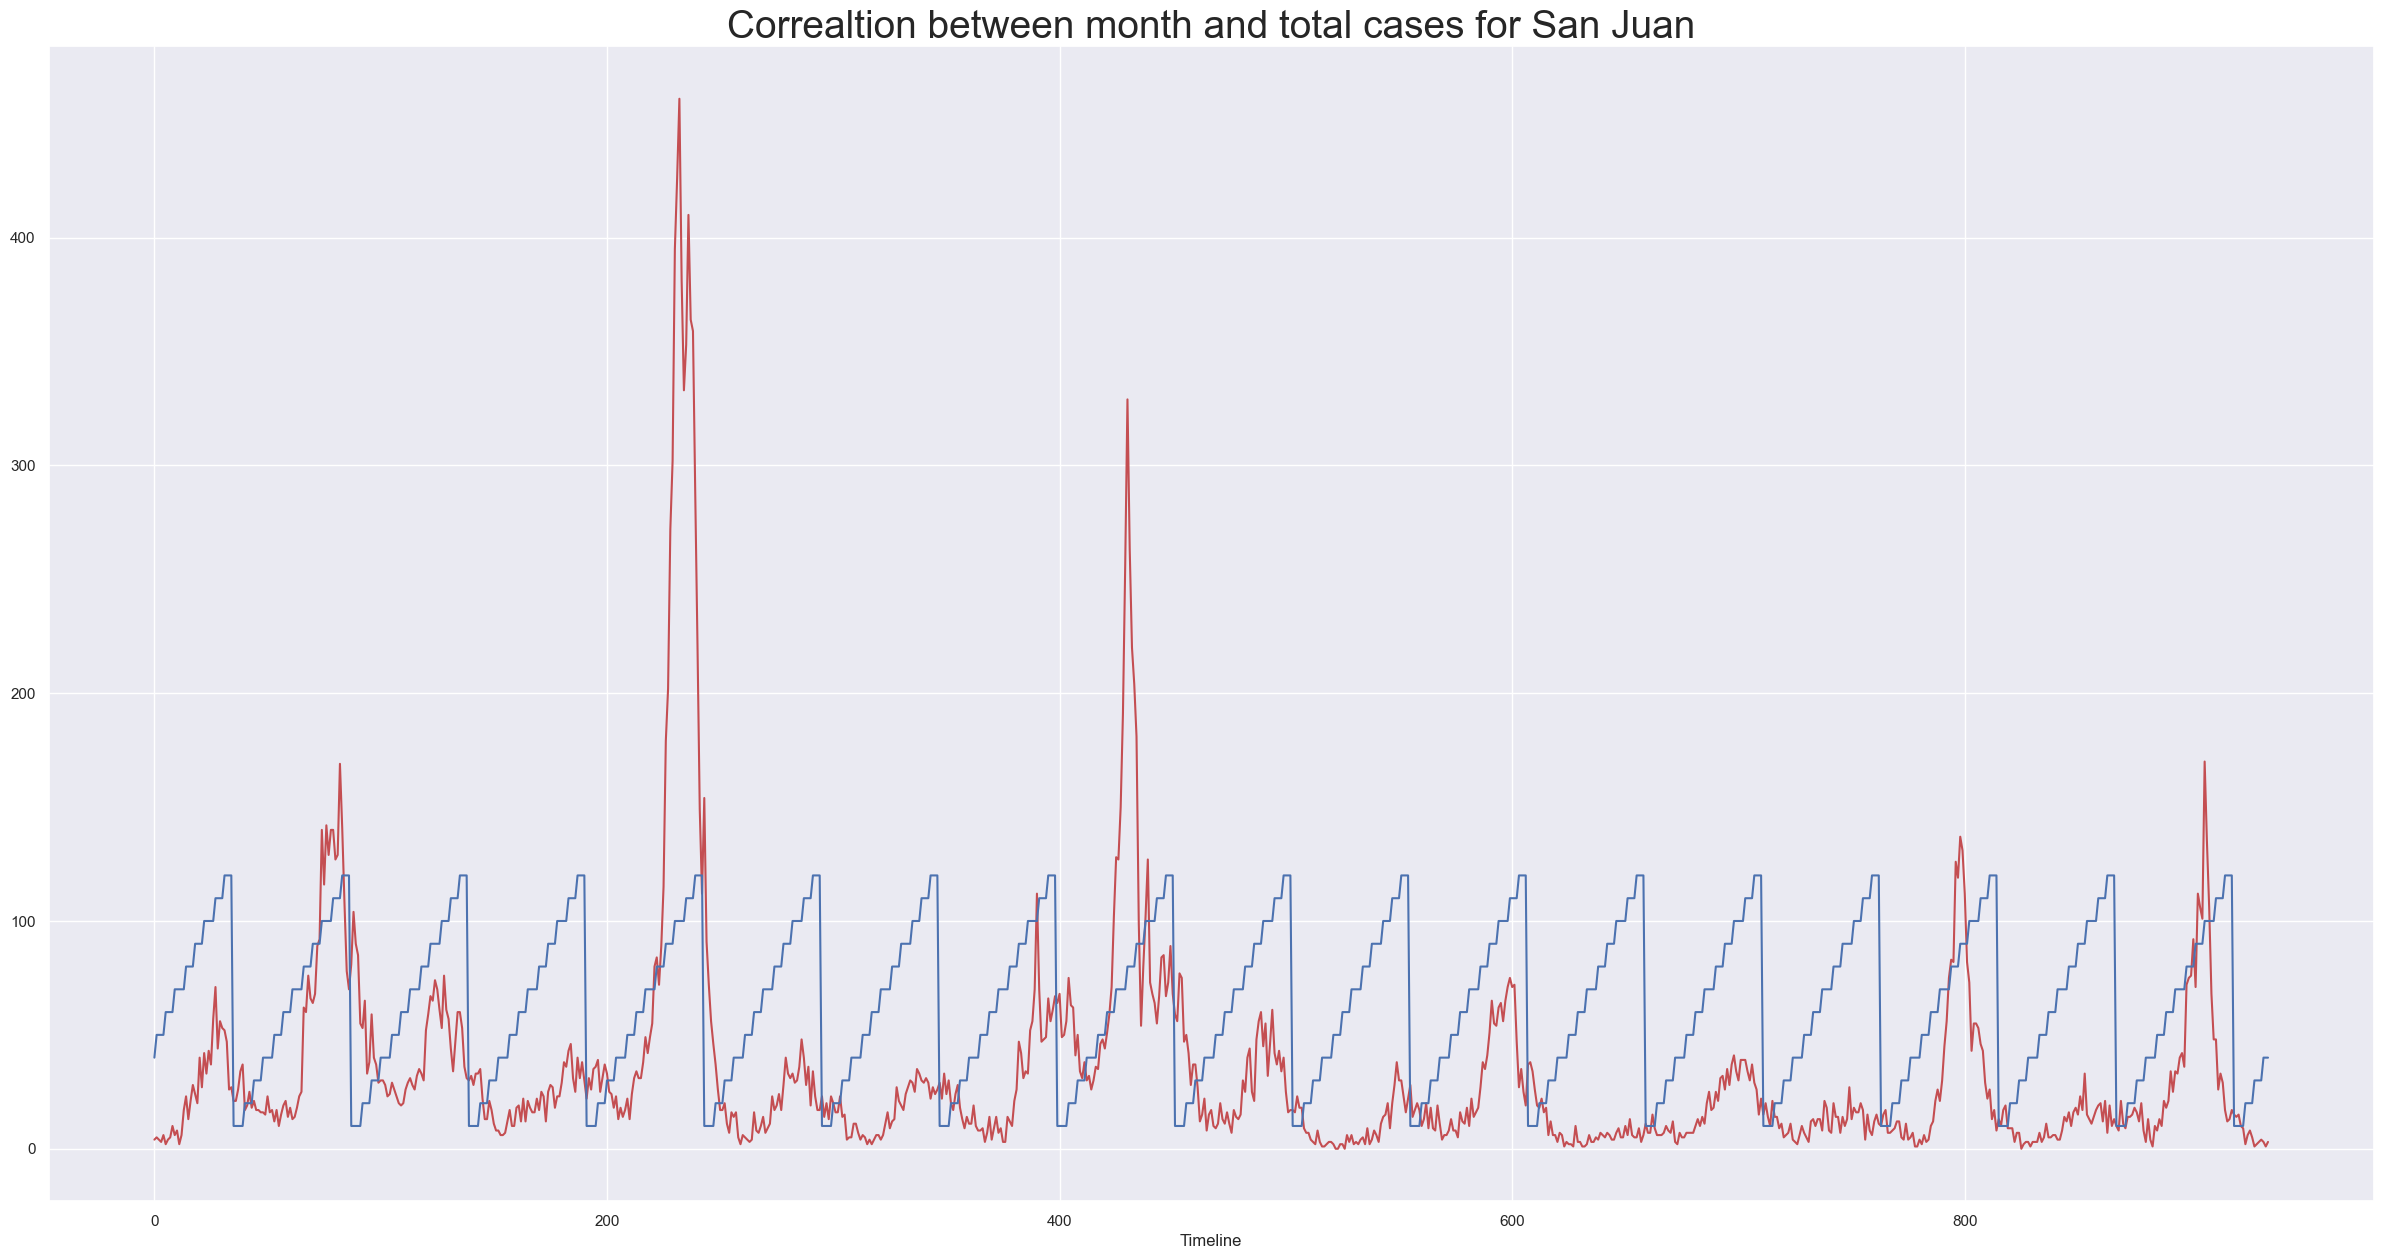

In [22]:
plt.figure(figsize=(30,15))
plt.plot(y_train[0:935], color = "r", label = "total_cases")
plt.plot(X_train.month[0:935]*10, color = "b", label = "month")
plt.title("Correaltion between month and total cases for San Juan", font = {'size':28})
plt.xlabel('Timeline')
plt.show()

#### Let as look at which month desease spread increases

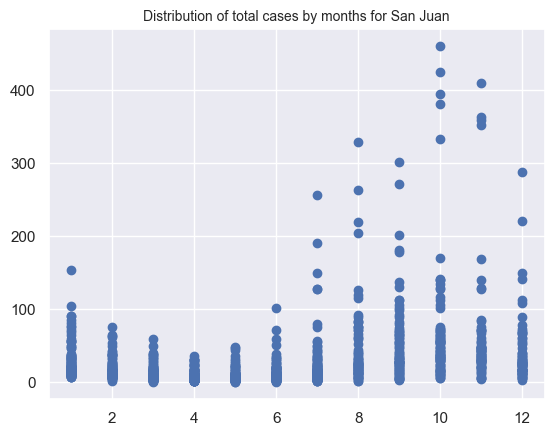

In [23]:
plt.scatter(X_train.month[0:935],y_train[0:935])
plt.title("Distribution of total cases by months for San Juan", font = {'size':10})
plt.show()

There are some very explicit spikes in number of cases, that probably appear in a period of warm and humid weather. The plots give us statistics, that spike of desease in San Juan happens in period of [July - December]

##### Here is a timeline of deseases in Iquitos

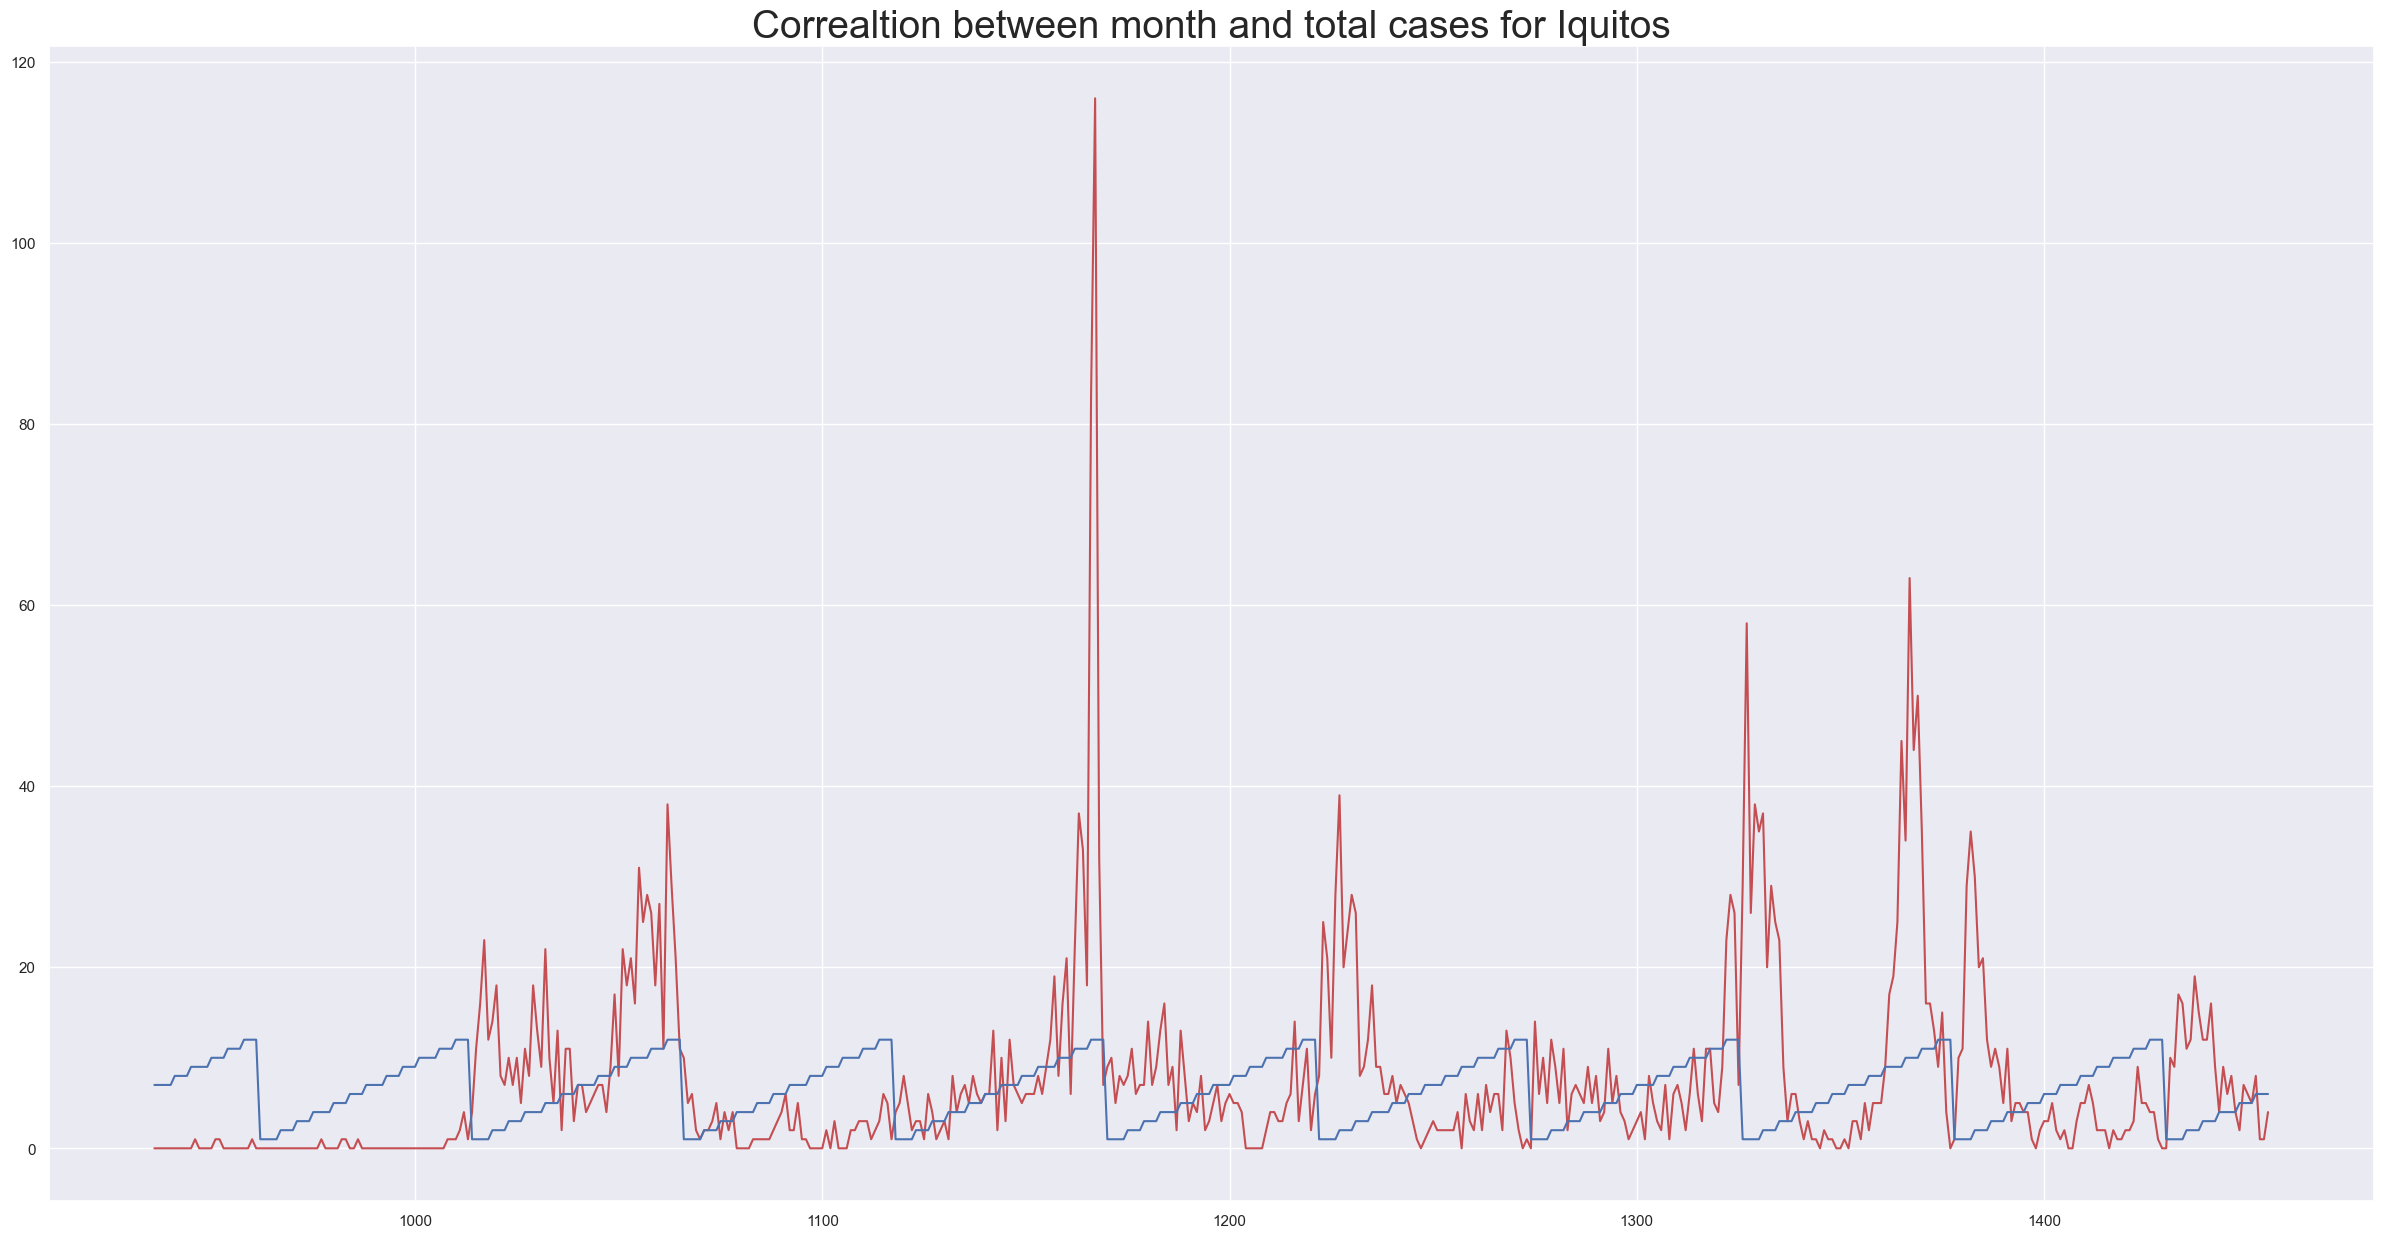

In [24]:
plt.figure(figsize=(30,15))
plt.plot(y_train[936:], color = "r")
plt.plot(X_train.month[936:], color = "b")
plt.title("Correaltion between month and total cases for Iquitos", font = {'size'   : 28})
plt.show()

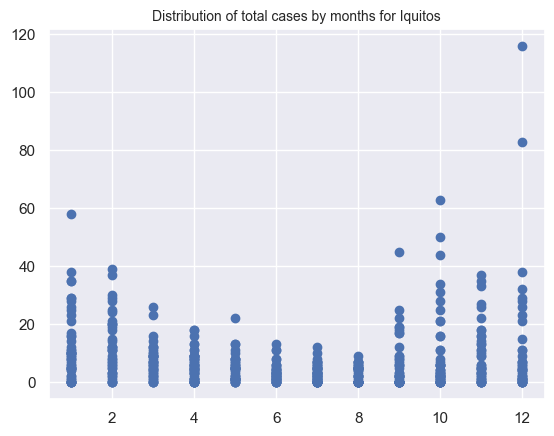

In [25]:
plt.scatter(X_train.month[936:],y_train[936:])
plt.title("Distribution of total cases by months for Iquitos", font = {'size':10})
plt.show()

This plot gives us a statistics, that spike of desease in Iquitos happens in period of [September - March]. 

The plots below represent the TREND in number of cases in both cities and weather conditions (values are modified for convenient plotting)

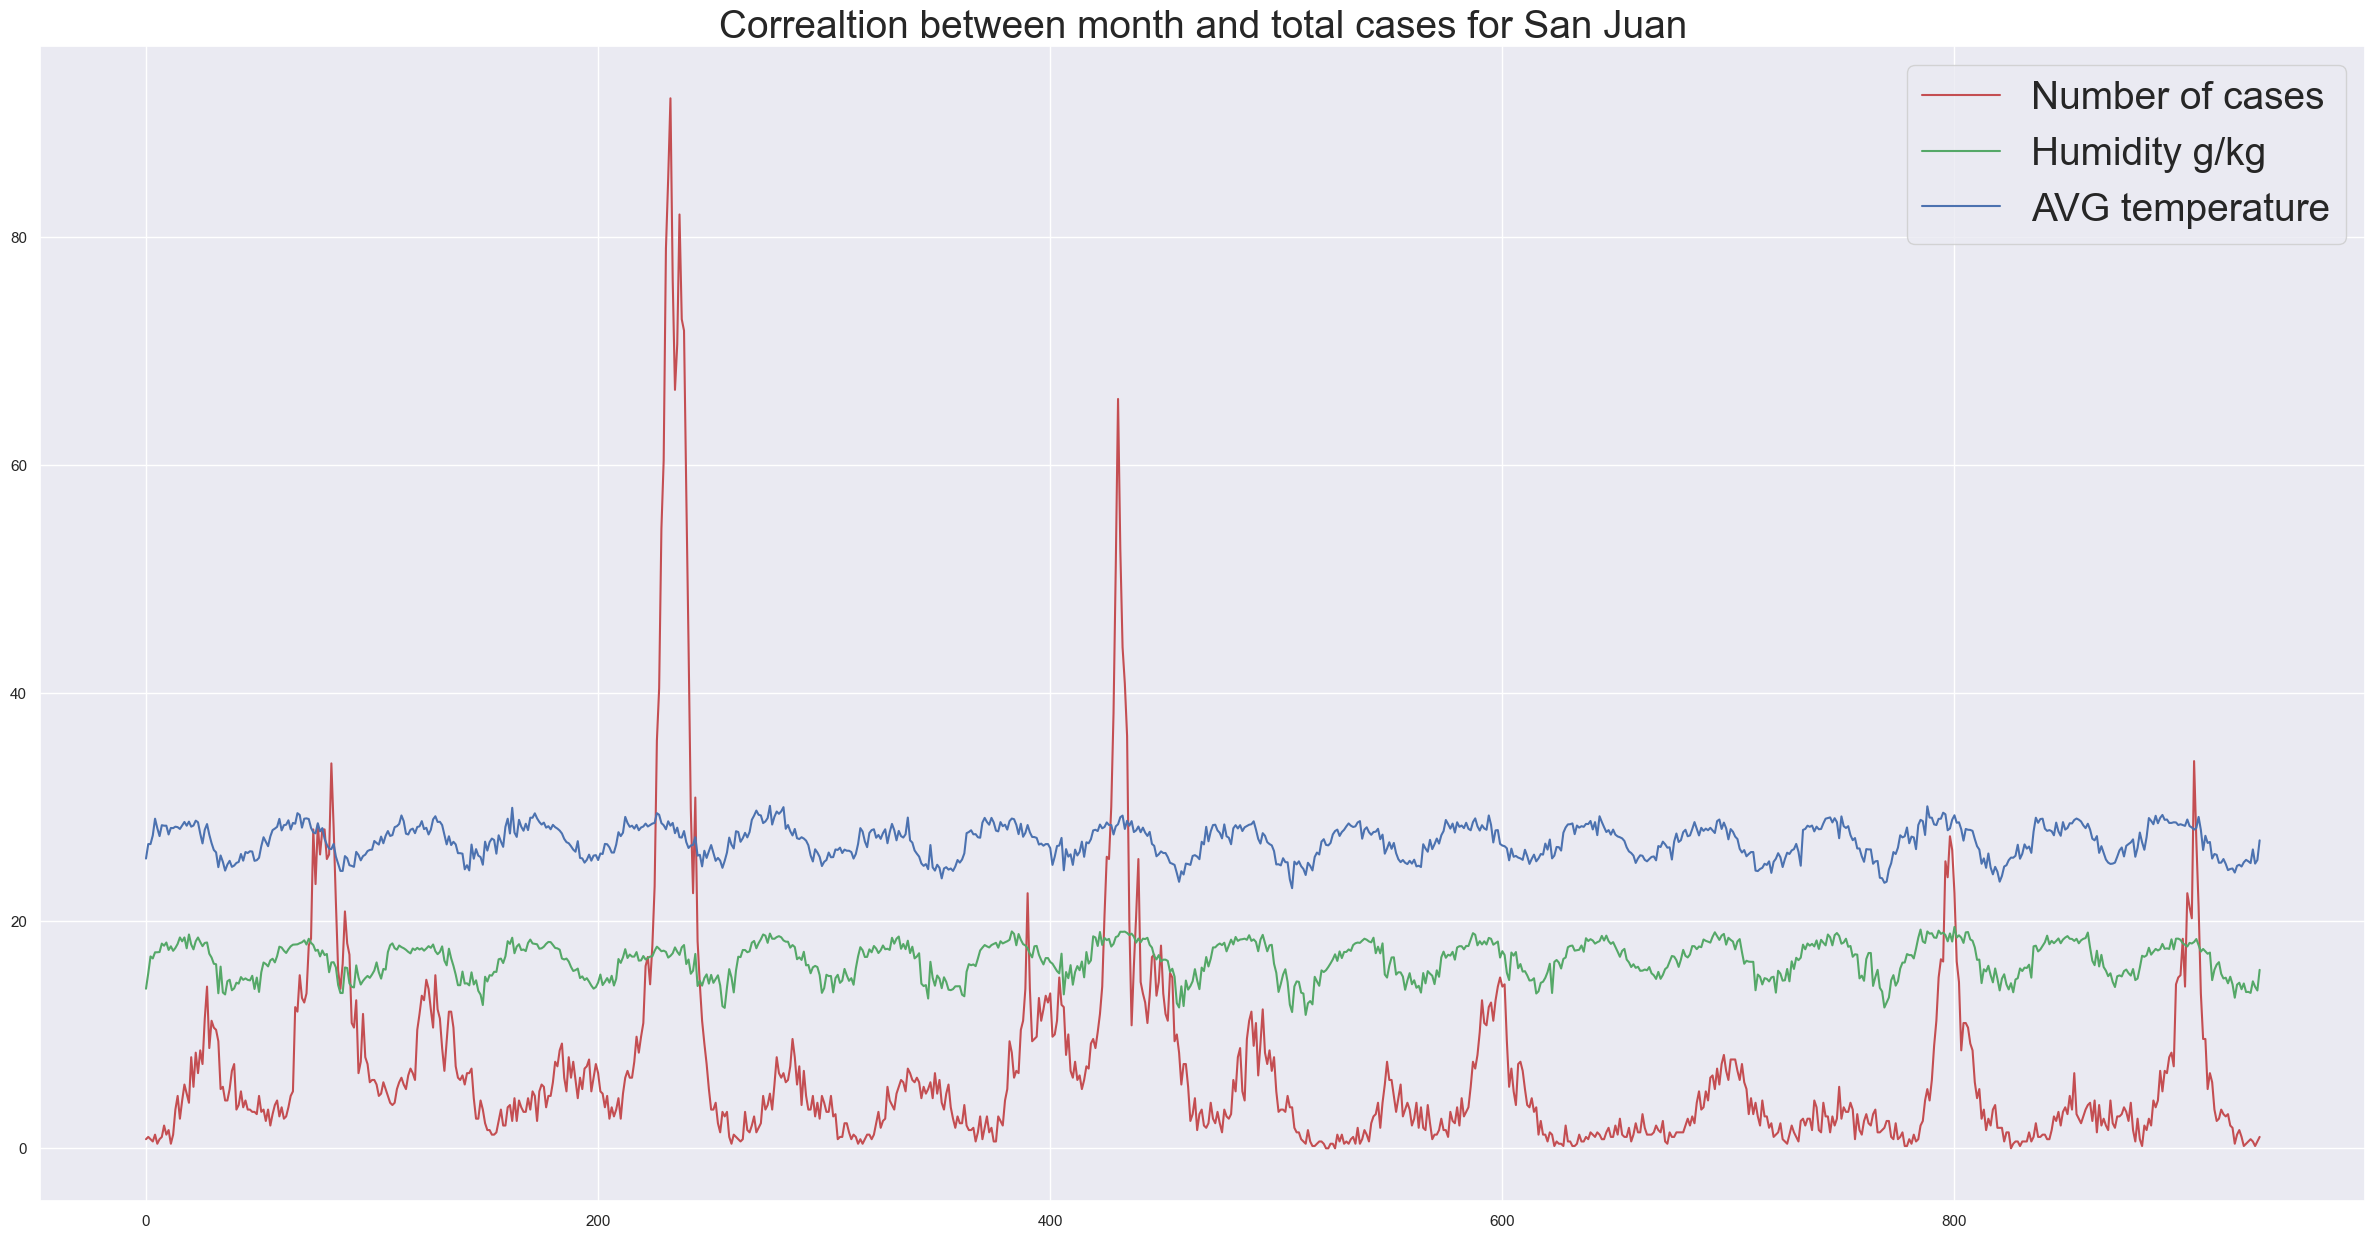

In [26]:
plt.figure(figsize=(30,15))
plt.plot(X_train.query("Iquitos == 1").total_cases/5, color = "r", label="Number of cases")
plt.plot(X_train.query("Iquitos == 1").reanalysis_specific_humidity_g_per_kg, color = "g", label="Humidity g/kg")
plt.plot(X_train.query("Iquitos == 1").station_avg_temp_c, color = "b", label="AVG temperature")
plt.title("Correaltion between month and total cases for San Juan", font = {'size'   : 28})
plt.legend(loc=1, fontsize = 28)
plt.show()

We see, that spikes of cases number happen when temperature and humidity starts to go down after its peak

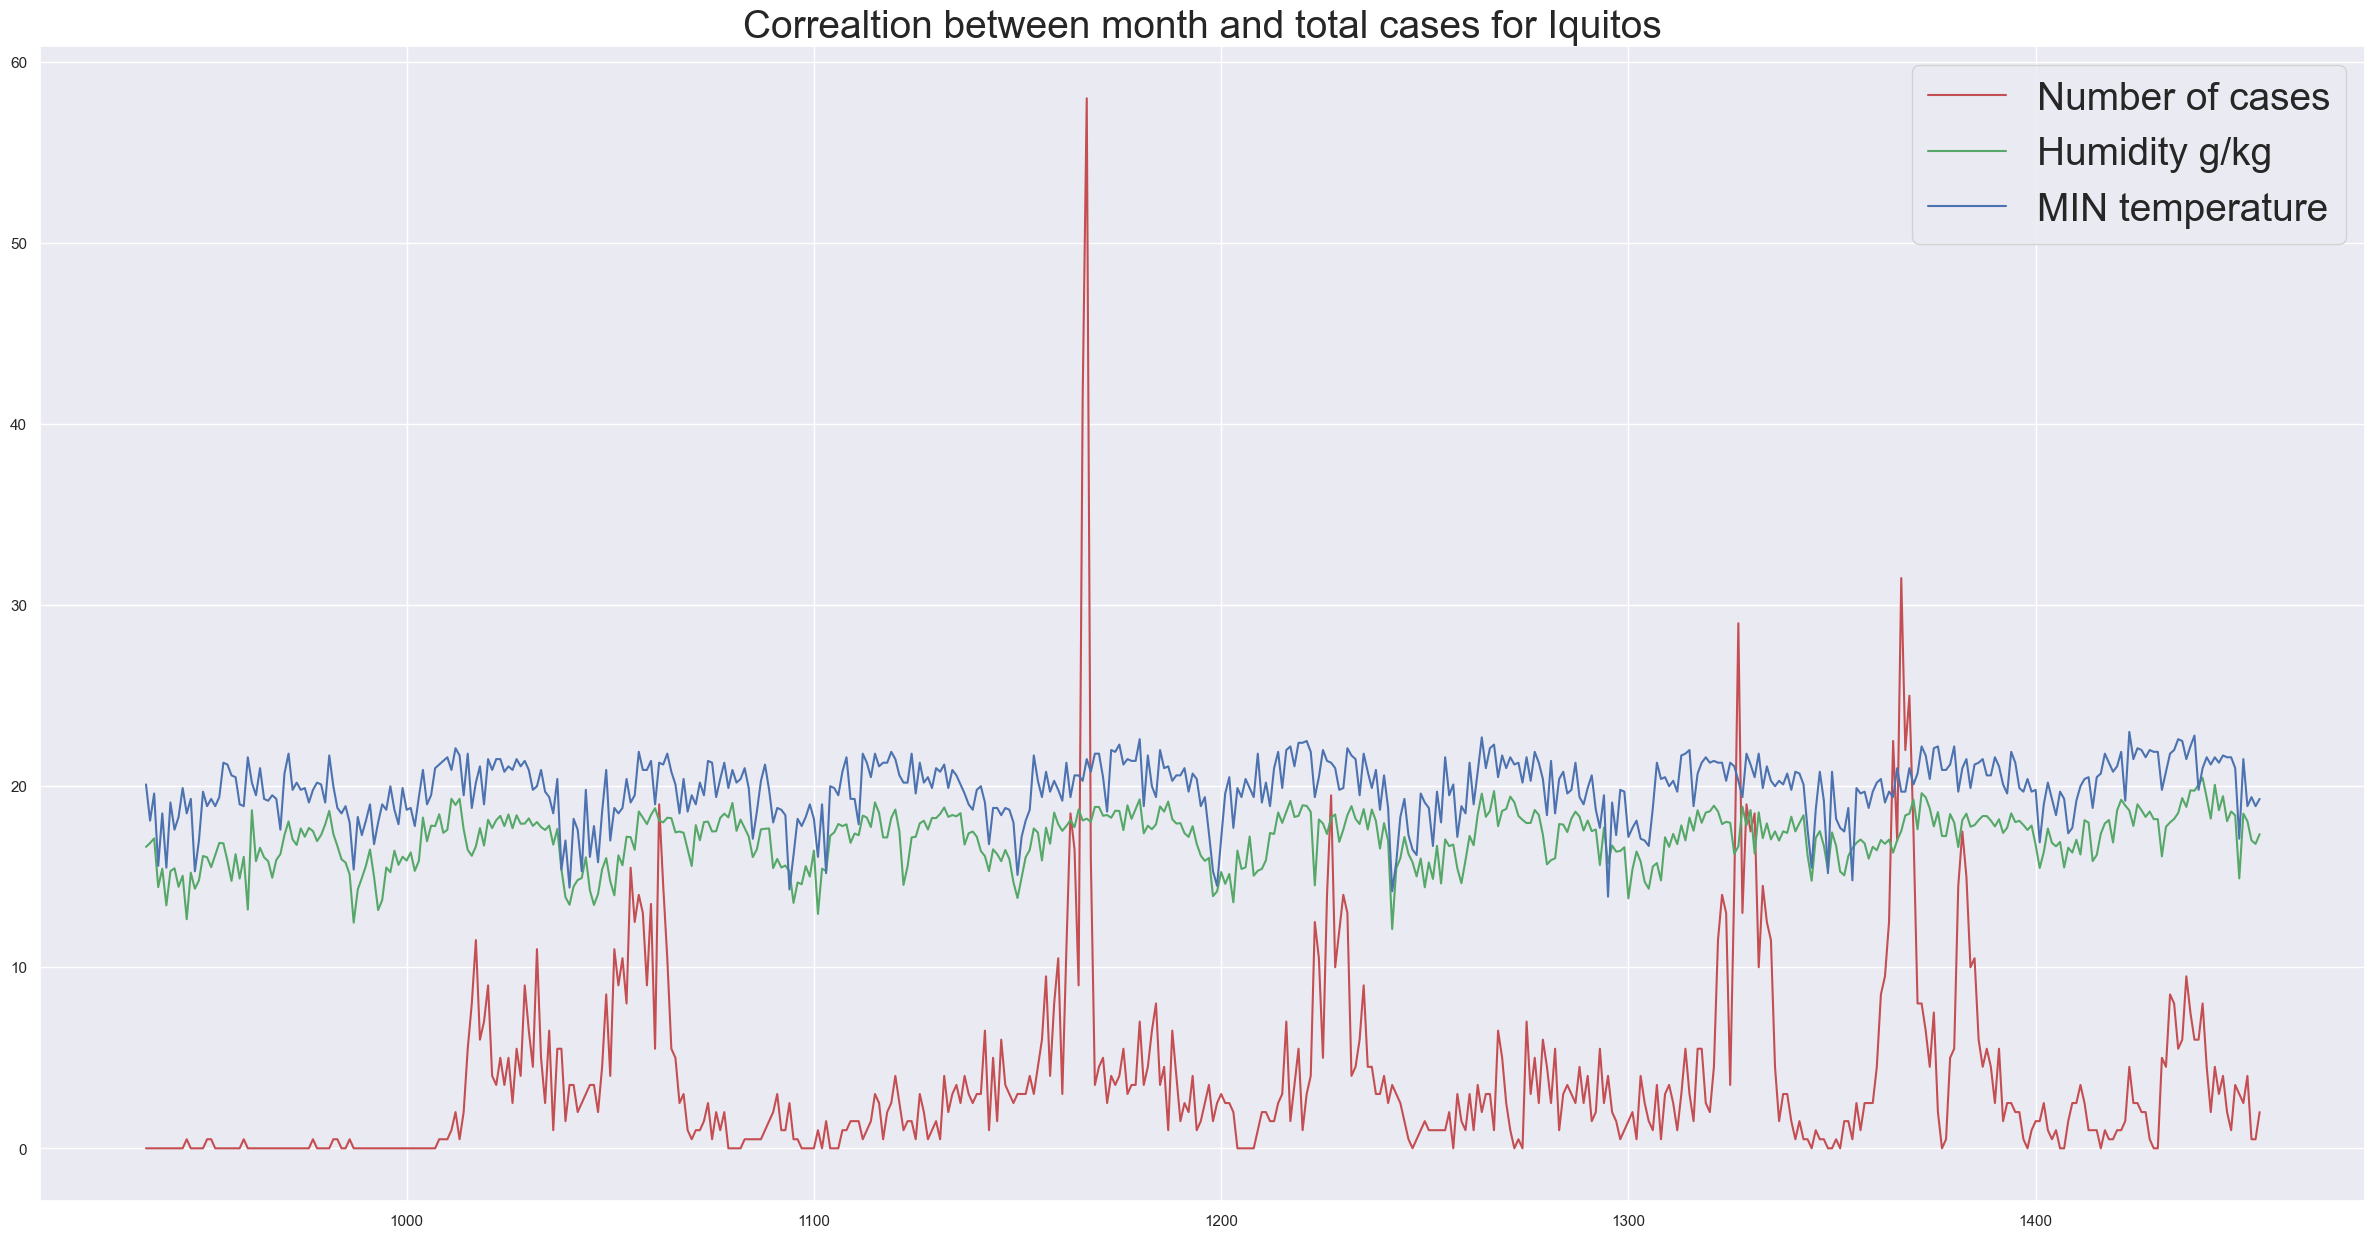

In [27]:
plt.figure(figsize=(30,15))
plt.plot(X_train.query("Iquitos == 0").total_cases/2, color = "r", label="Number of cases")
plt.plot(X_train.query("Iquitos == 0").reanalysis_specific_humidity_g_per_kg, color = "g", label="Humidity g/kg")
plt.plot(X_train.query("Iquitos == 0").reanalysis_min_air_temp_k-273, color = "b", label="MIN temperature")
plt.title("Correaltion between month and total cases for Iquitos", font = {'size'   : 28})
plt.legend(loc=1, fontsize = 28)
plt.show()

In Iquitos there is no clear seasonal trend of temperature fluctations, but definitely number of cases is connected to humidity (when it is close to peaks)

##### So, finally let's add a feature that represents the weather conditions that mostly suitable for mosquitto breeding (based on the months with highest number of cases, that we described above)

In [28]:
print("Humidity of months with highest deseases in San Juan:")
print(X_train.query("San_Juan==0").groupby('month')['reanalysis_specific_humidity_g_per_kg'].mean()[6:12])

print("\nAVG temperature of months with highest deseases in San Juan:")
print(X_train.query("San_Juan==0").groupby('month')['station_avg_temp_c'].mean()[6:12])

print("\nHumidity of months with highest deseases in Iquitos:")
print(X_train.query("Iquitos==0").groupby('month')['reanalysis_specific_humidity_g_per_kg'].mean()[8:12],\
      X_train.query("Iquitos==0").groupby('month')['reanalysis_specific_humidity_g_per_kg'].mean()[0:3])

print("\nMIN temperature of months with highest deseases in San Juan:")
print(X_train.query("Iquitos==0").groupby('month')['reanalysis_min_air_temp_k'].mean()[8:12],\
      X_train.query("Iquitos==0").groupby('month')['reanalysis_min_air_temp_k'].mean()[0:3])



Humidity of months with highest deseases in San Juan:
month
7     17.741079
8     18.147083
9     18.209699
10    17.960831
11    17.067401
12    15.823016
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64

AVG temperature of months with highest deseases in San Juan:
month
7     28.249841
8     28.454563
9     28.417105
10    28.039369
11    27.055556
12    25.910714
Name: station_avg_temp_c, dtype: float64

Humidity of months with highest deseases in Iquitos:
month
9     16.010000
10    17.319787
11    18.160036
12    18.070643
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64 month
1    17.474629
2    17.553714
3    18.130750
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64

MIN temperature of months with highest deseases in San Juan:
month
9     292.190698
10    293.248936
11    293.967500
12    294.282500
Name: reanalysis_min_air_temp_k, dtype: float64 month
1    293.6720
2    293.6525
3    293.7525
Name: reanalysis_min_air_temp_k, dtype: float64


Manual analysis of values above, and we put the boundries into a new feature:

In [29]:
X_train['Mosquitto_is_happy_SJ'] = X_train.query("San_Juan==0")\
        [['reanalysis_specific_humidity_g_per_kg','station_avg_temp_c']].\
        apply(lambda x: True if((x[0]>=15.8) and (x[1]>=27)) else False, axis=1)

X_train['Mosquitto_is_happy_IQ'] = X_train.query("San_Juan==1")\
        [['reanalysis_specific_humidity_g_per_kg','reanalysis_min_air_temp_k']].\
        apply(lambda x: True if((x[0]>=16.0) and (x[1]>293)) else False, axis=1)

Let's plot this new feature with the trend of case numbers

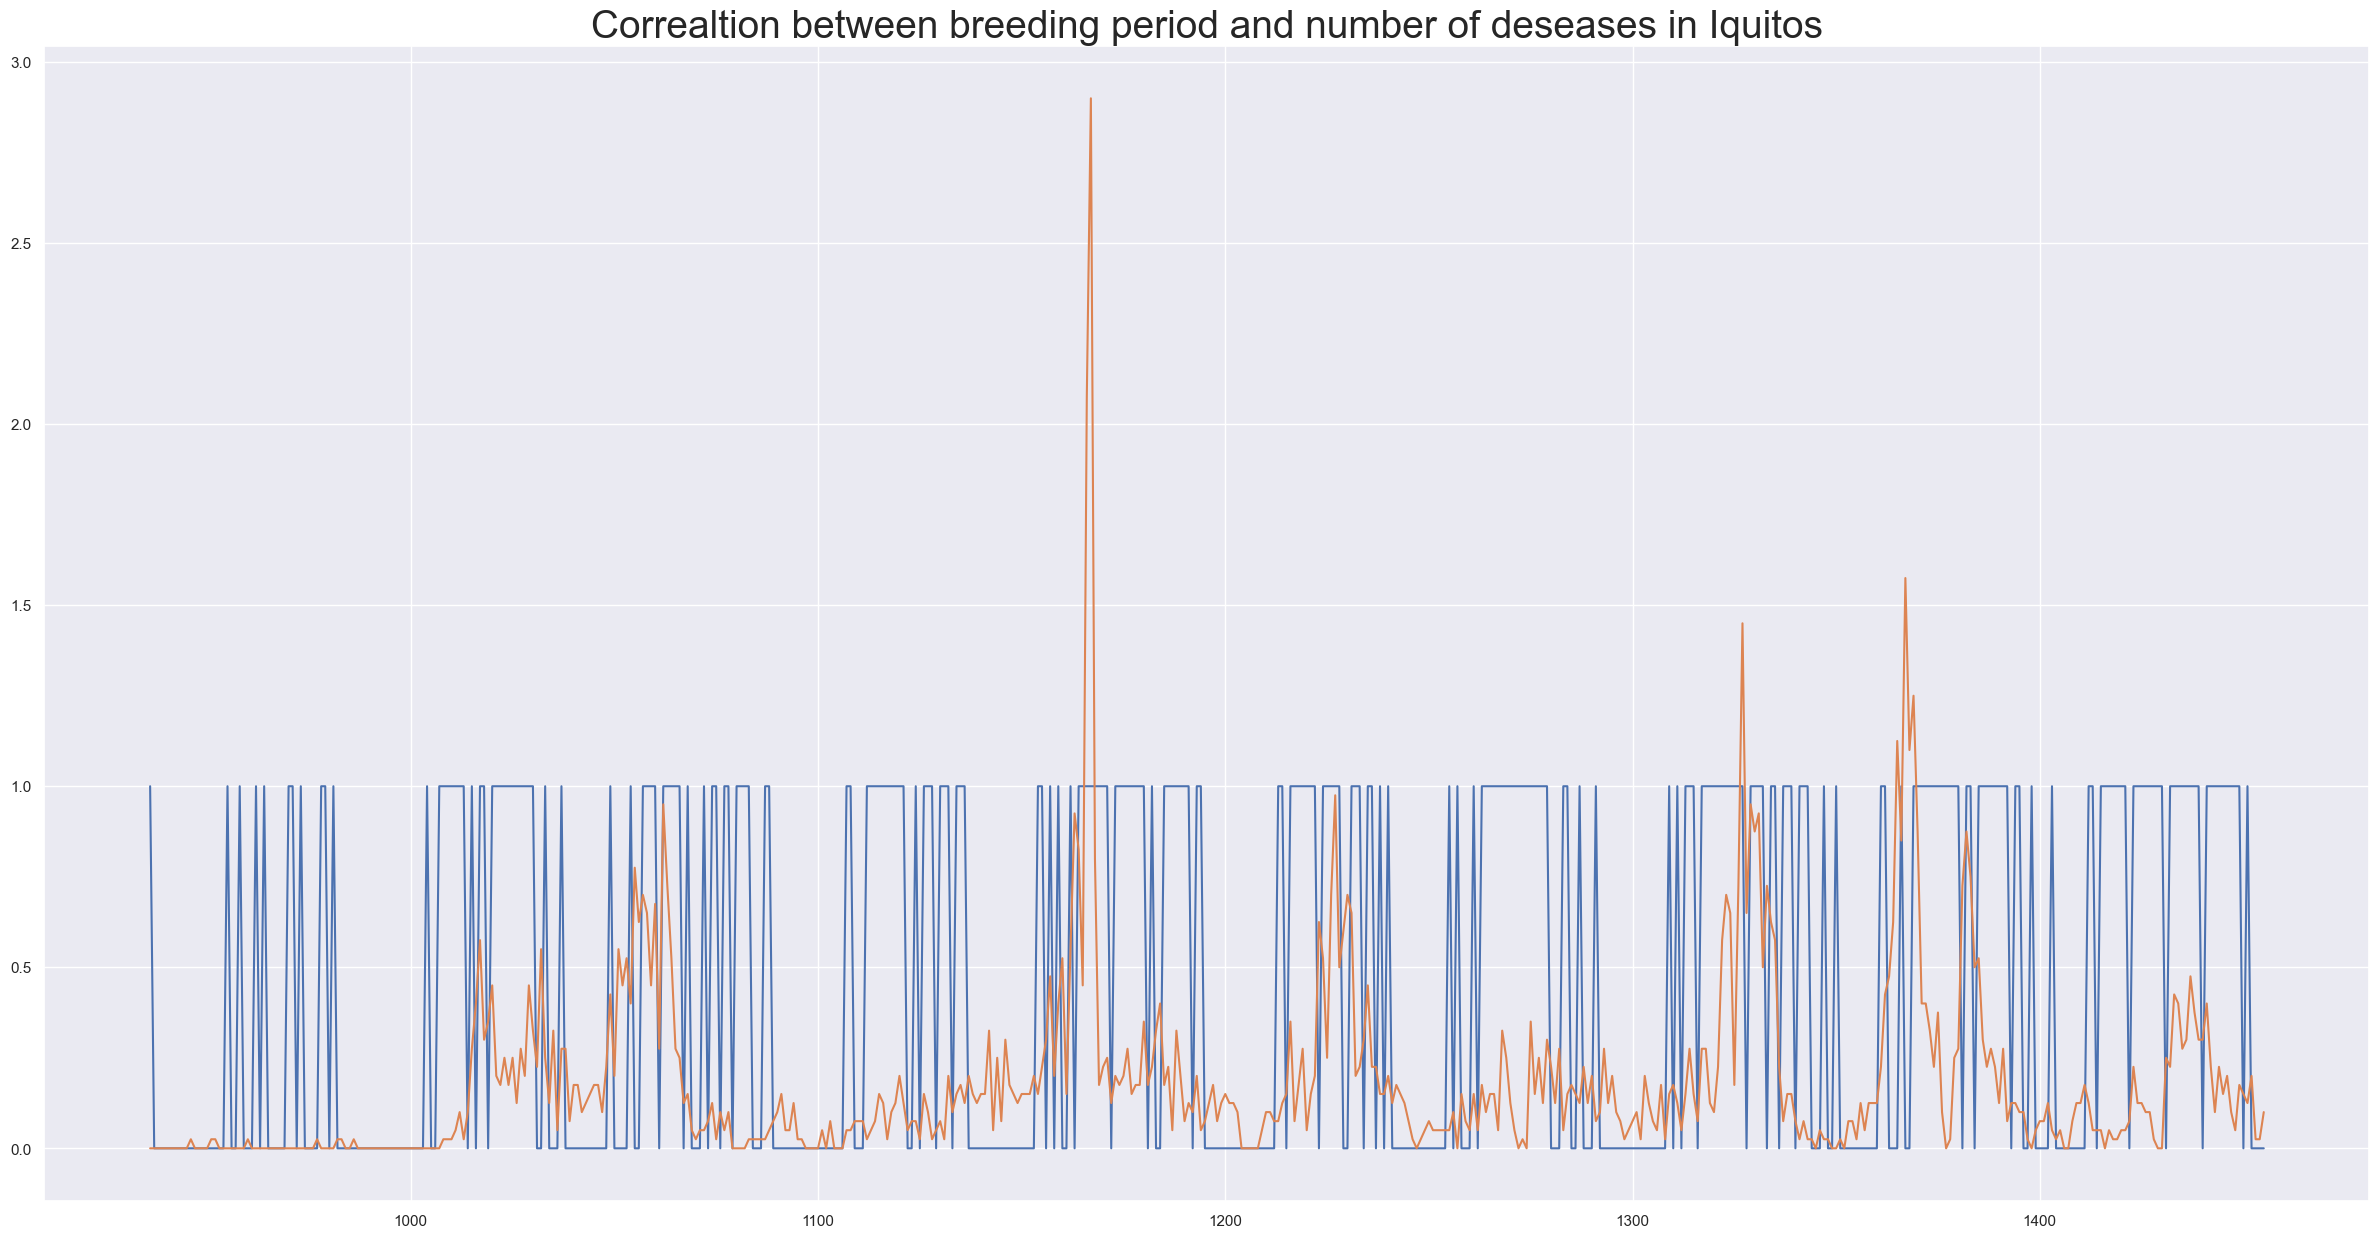

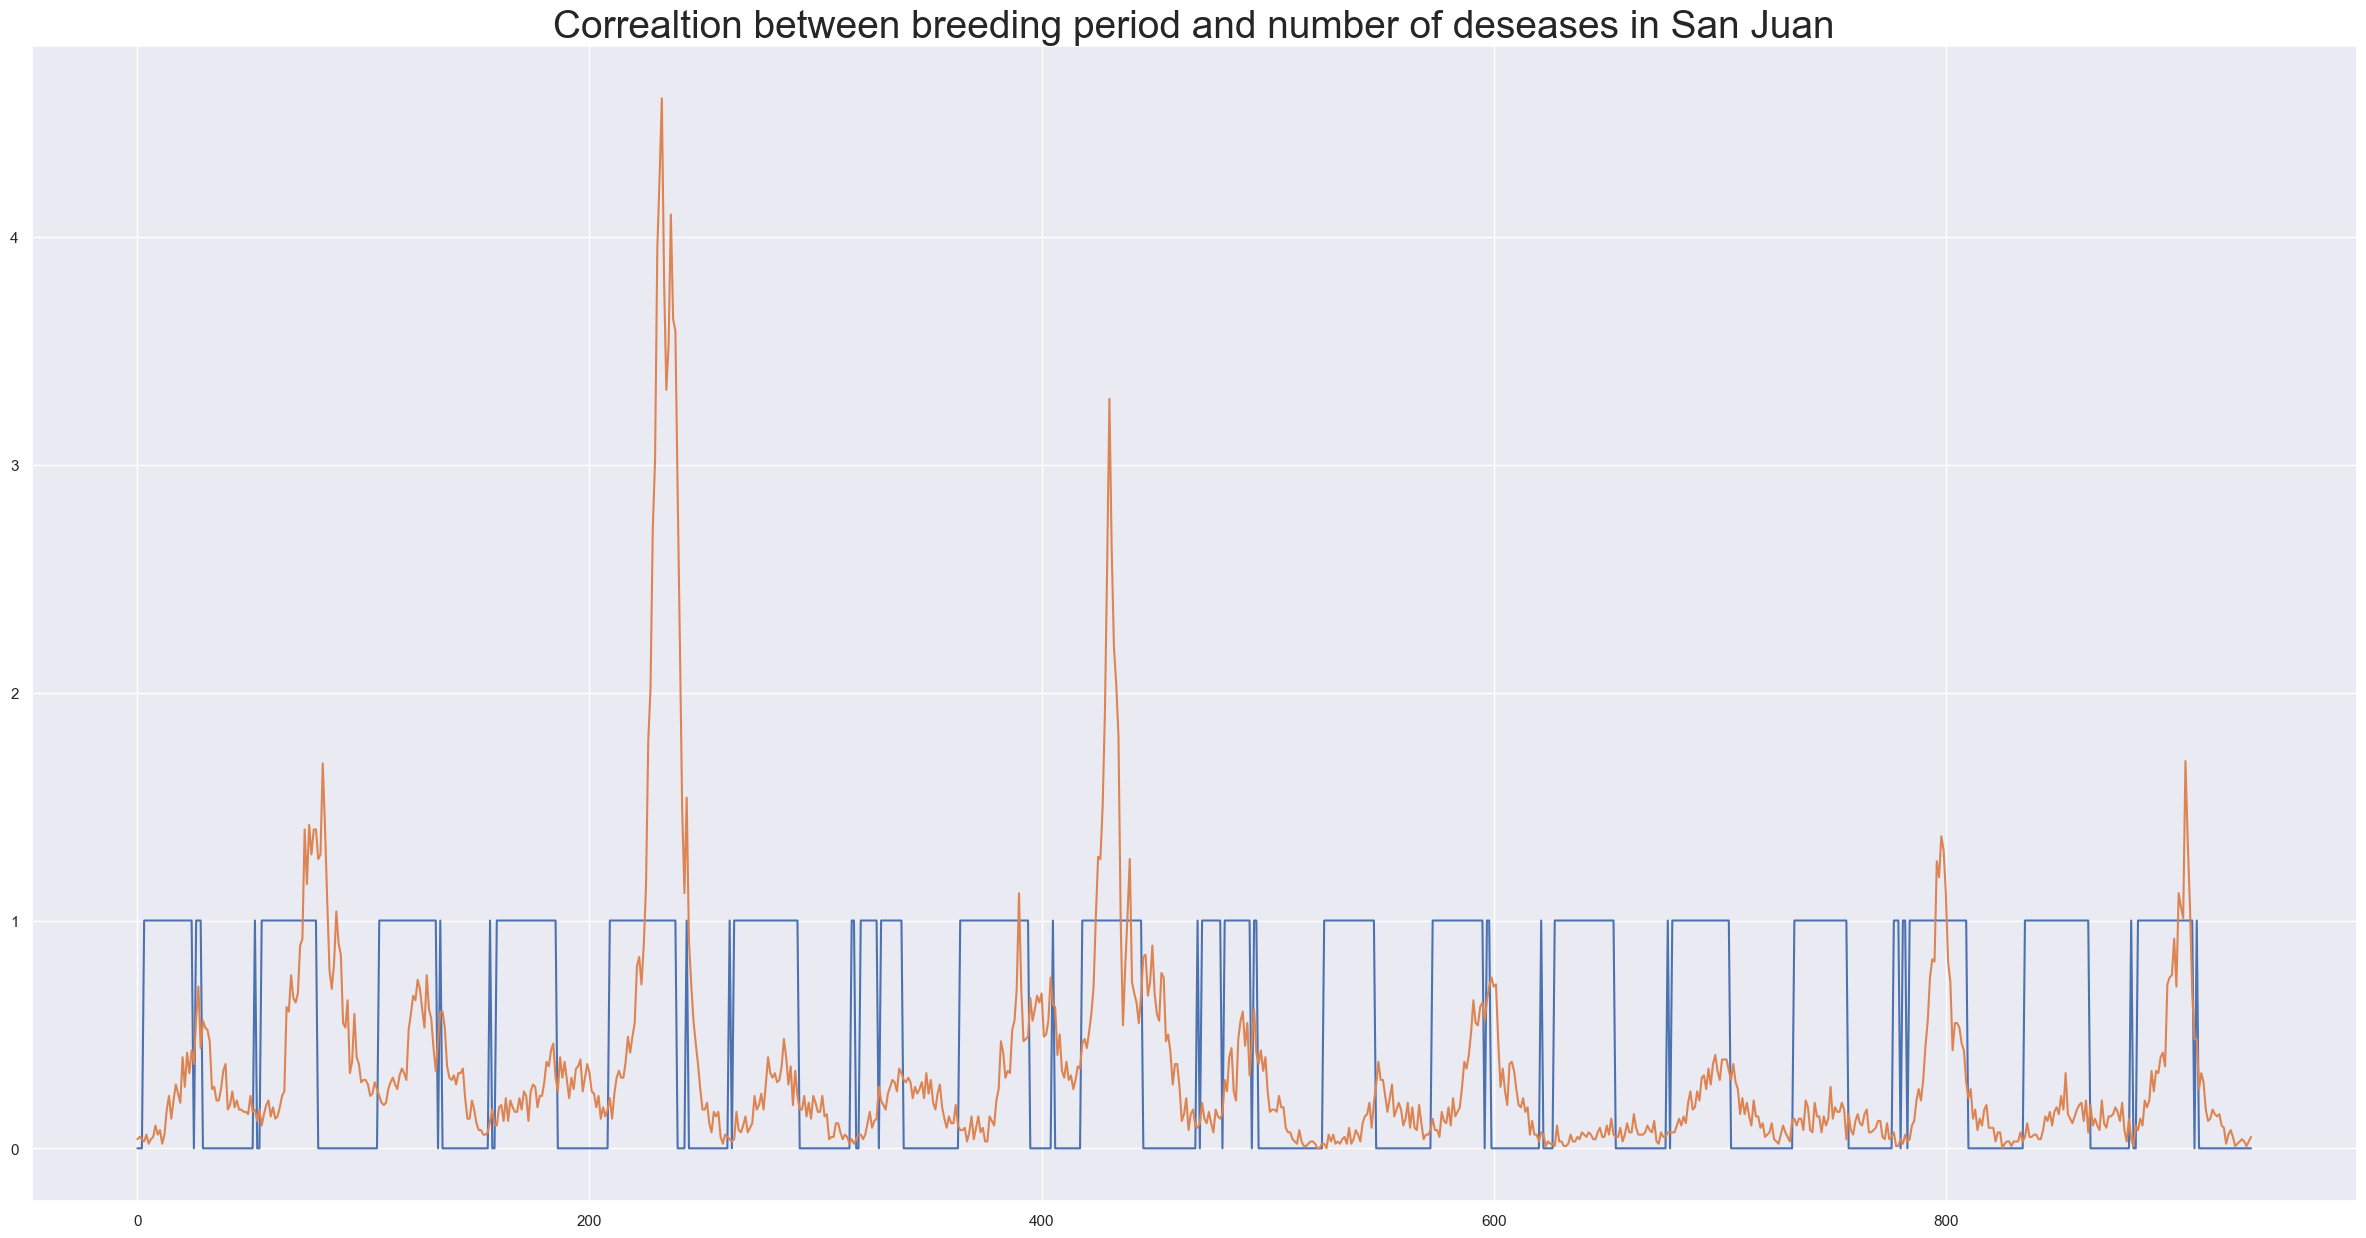

In [30]:
plt.figure(figsize=(30,15))
plt.title("Correaltion between breeding period and number of deseases in Iquitos", font = {'size'   : 28})
plt.plot(X_train.query("San_Juan==1").Mosquitto_is_happy_IQ)
plt.plot(X_train.query("San_Juan==1").total_cases/40)

plt.figure(figsize=(30,15))
plt.title("Correaltion between breeding period and number of deseases in San Juan", font = {'size'   : 28})
plt.plot(X_train.query("San_Juan==0").Mosquitto_is_happy_SJ)
plt.plot(X_train.query("San_Juan==0").total_cases/100)

### We can clearly see that in long timeframes with positive conditions for breeding the number of cases increases!
#### When there are fluctations of the parameter - number of cases goes down!

### Let's not stop here. Yet another feature.
##### Let's introduce a "time factor" of "Mosquitto is happy" feature. To be exact, it will be a number of previous observations with positive "Mosquitto is happy". We believe, that if this factor is small, the number of cases decreases. If this factor goes large (good breeding conditions over large amount of observations), than number of deseases will go up 

In [31]:
def _daysofhappiness():
    breed_days = np.zeros(1456)
    for i in range(935):
        if X_train.loc[i].Mosquitto_is_happy_SJ:
            breed_days[i]=breed_days[i-1]+1
        else:
            breed_days[i]=0
    for i in range(936,1455):
        if X_train.loc[i].Mosquitto_is_happy_IQ:
            breed_days[i]=breed_days[i-1]+1
        else:
            breed_days[i]=0
    return breed_days

_daysofhappiness()
X_train['Breeding_days'] = _daysofhappiness()

This feature, once again, represents the possibility of continuation of deseases growth. We belive, it will strongly correlate with the target values. Let's check correlation of all parapeters once again.

In [32]:
X_num_train = X_train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month','vegetation_index_total',
       'Foggy','total_cases','Mosquitto_is_happy_SJ','Mosquitto_is_happy_IQ','Breeding_days']]

San_Juan_Corr  = X_num_train[0:935].corr()
Iquitos_Corr = X_num_train[936:].corr()


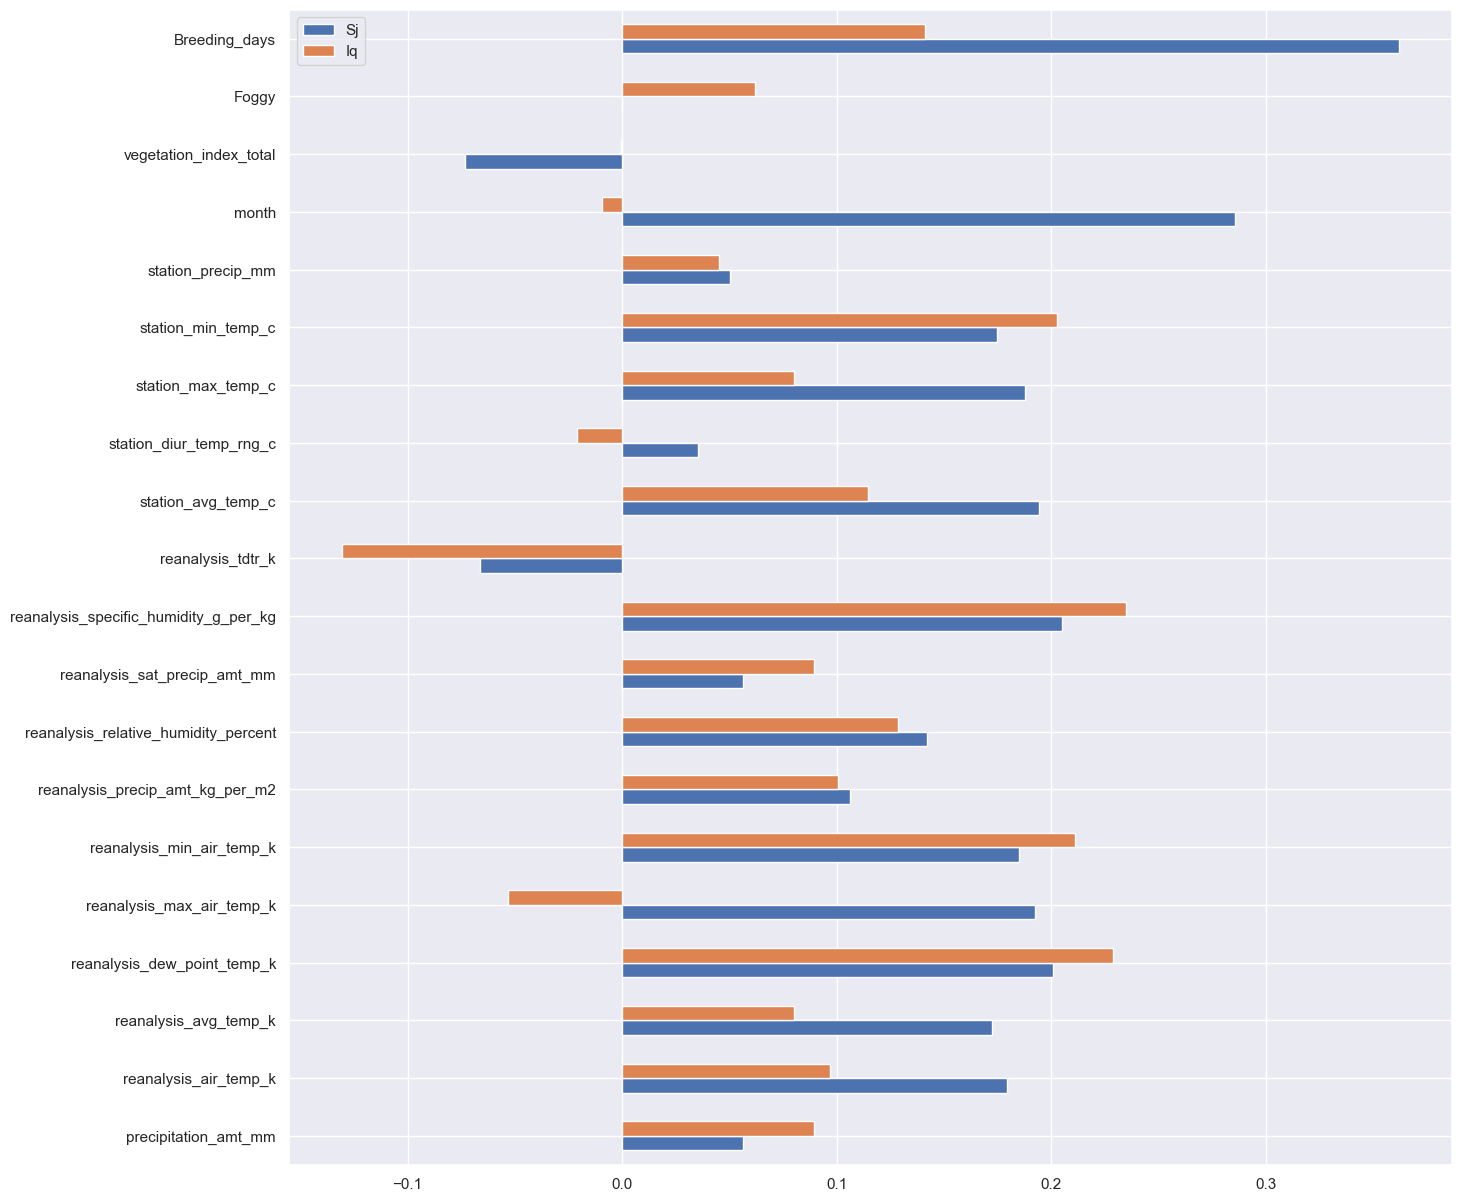

In [33]:
x =   ['precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month','vegetation_index_total',
       'Foggy','Breeding_days']

df = pd.DataFrame({'Sj' : San_Juan_Corr.total_cases.drop('total_cases'),
                    'Iq' : Iquitos_Corr.total_cases.drop('total_cases')}, index =x)
ax = df.plot.barh(figsize=(15,15))

### Find correlation between current total cases and weather condition from the past (shift) weeks

In [34]:
# compute the correlations
# also exclude categorical and day/year
X_num = X_train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month','vegetation_index_total',
       'Foggy','total_cases','Breeding_days']]

X_num_train_shift = X_num

shift = 2 # delay 2 weeks

for i in range(shift, X_num.shape[0]):
    X_num_train_shift.iloc[i - shift, :] = X_num.iloc[i, :] #

X_num_train_shift['total_cases'] = X_train.iloc[shift:, X_train.columns.get_loc("total_cases")]  

#X_num_train_shift.dropna(inplace = True)

San_Juan_Corr_Shift = X_num_train_shift[0:935 -shift].corr()
Iquitos_Corr_Shift = X_num_train_shift[936 - shift:].corr()

C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\3003259888.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num_train_shift['total_cases'] = X_train.iloc[shift:, X_train.columns.get_loc("total_cases")]


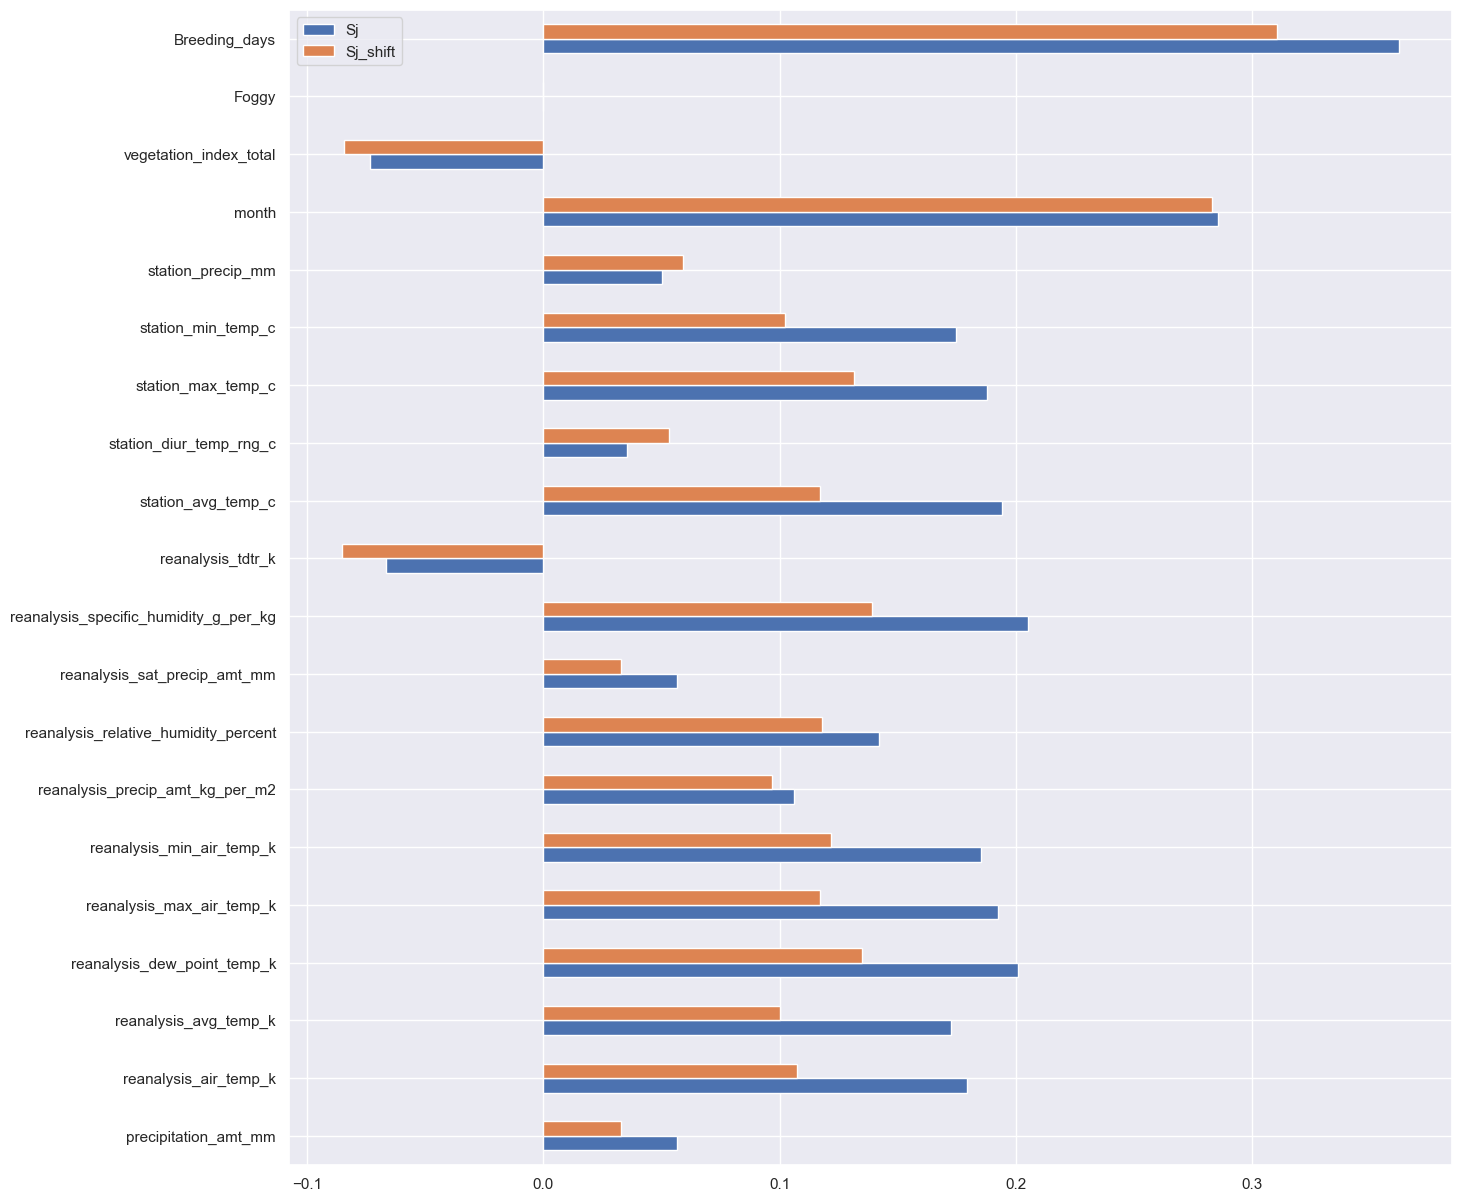

In [35]:
df = pd.DataFrame({'Sj' : San_Juan_Corr.total_cases.drop('total_cases'),
                    'Sj_shift' : San_Juan_Corr_Shift.total_cases.drop('total_cases')}, index =x)
ax = df.plot.barh(figsize=(15,15)) 

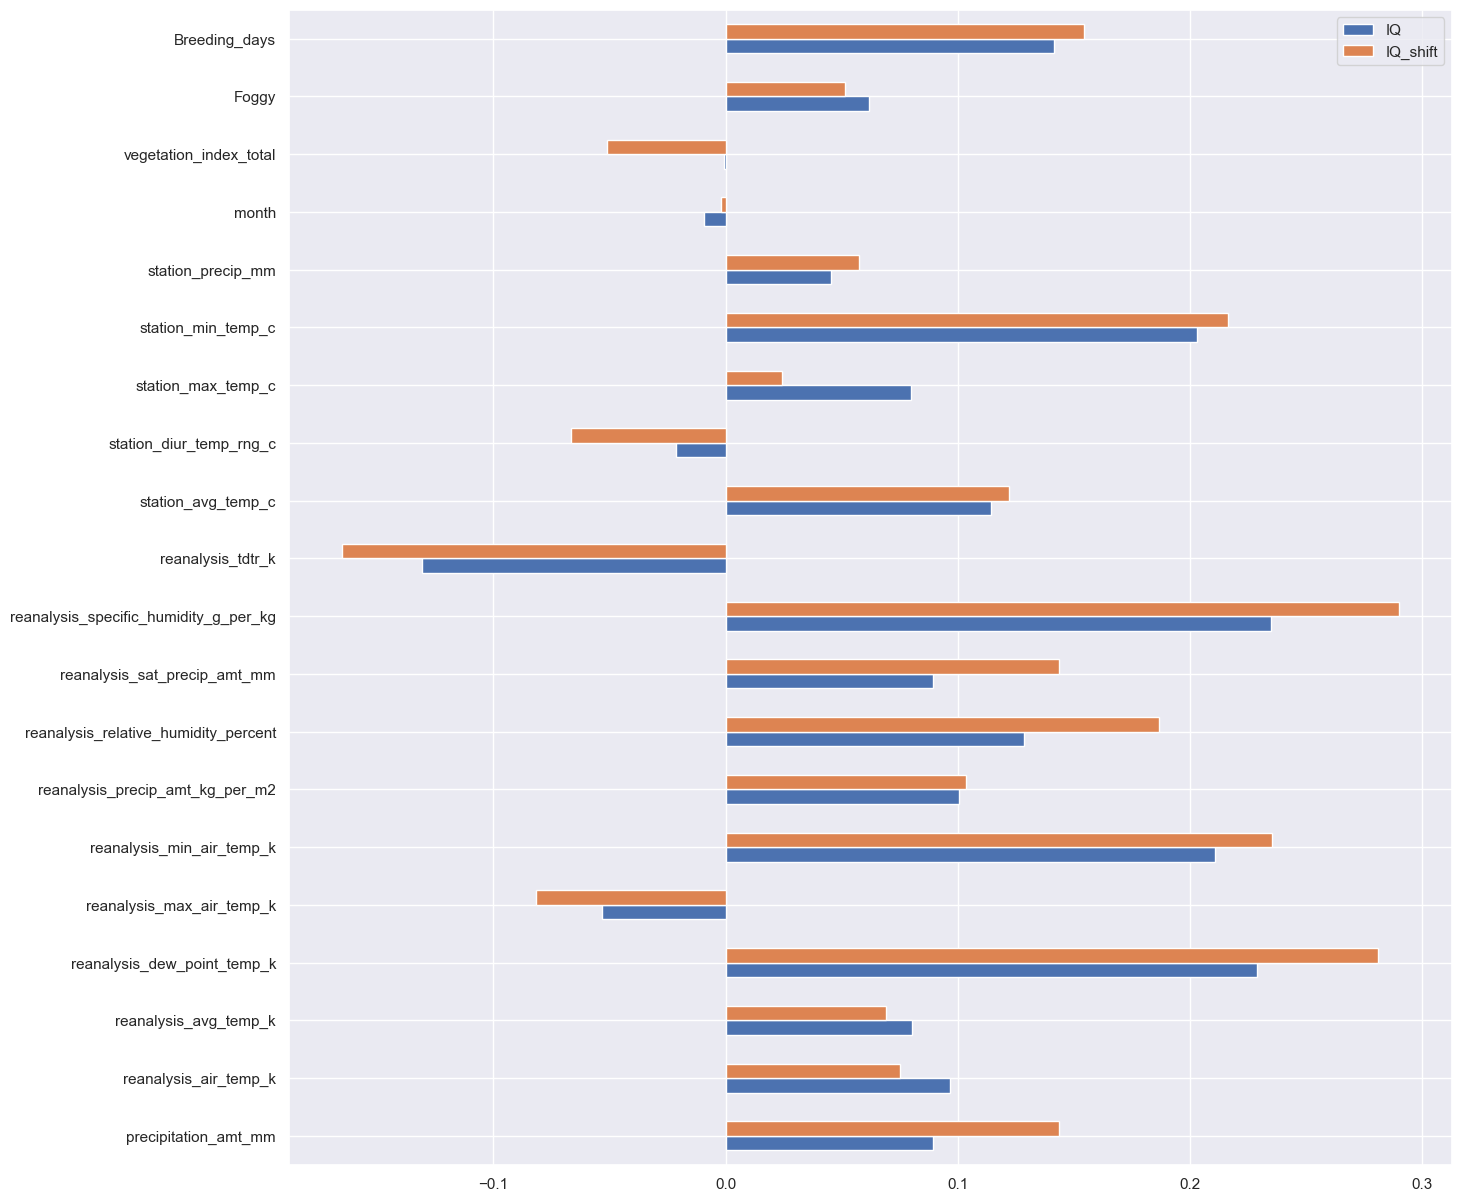

In [36]:
df = pd.DataFrame({'IQ' : Iquitos_Corr.total_cases.drop('total_cases'),
                    'IQ_shift' : Iquitos_Corr_Shift.total_cases.drop('total_cases')}, index =x)
ax = df.plot.barh(figsize=(15,15))

### From last graph we can observe that if we estimate  disease spread with weather condition delay for 2 weeks, almost all features will have better correlation with our target

# 5) Build a proper cross-validation procedure
1. select an appropriate measure of quality 
2. choose an ML model reasonably
3. look for a good set of hyperparameters
4. use the prepared cross-validation procedure to estimate the quality of prediction.

Well, let's split a whole dataset in two, related to each city

In [37]:
SJ = X_train.iloc[0:935]
IQ = X_train.loc[936:]

In [38]:
IQ.index -= 936

We drop useless columns now and perform some additional processing

In [39]:
IQ.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)
SJ.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)


C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\2166472470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQ.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)
C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\2166472470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SJ.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)


### Finally we split the data

according to the correlation indexes, we put highly-correlating data to training (correlation index above 0.15)

#### Let's just quickly remind ourselves which columns corelate the best

In [40]:
San_Juan_Corr.query("total_cases >= 0.15").index

Index(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c',
       'month', 'total_cases', 'Breeding_days'],
      dtype='object')

In [41]:
Iquitos_Corr.query("total_cases >= 0.15").index

Index(['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c',
       'total_cases'],
      dtype='object')

Let's create new dataframes for each city

In [42]:
# Try different way
Y_SJ = SJ["total_cases"]
Y_IQ = IQ["total_cases"]


num_features_SJ = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c',
       'month', 'Breeding_days']
num_features_IQ = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c',
        'Breeding_days']


X_SJ = SJ[num_features_SJ]
X_IQ = IQ[num_features_IQ]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

### Choosing CV
### As we have to prognose future disease outbreaks for grid search we would use TimeSeriesSplit which splits data according to time.

####  We intend to use n_splits = 18 for SJ and = 10  for IQ
#### this will allow us to make predictions for next year each time (19 years data records for SJ and 11 for IQ in test dataset)

In [44]:
dengue_labels_train.query('city == "sj"').year.value_counts().shape
dengue_labels_train.query('city == "iq"').year.value_counts().shape

(11,)

In [45]:
# explain
tscv_SJ = TimeSeriesSplit(18)
tscv_IQ = TimeSeriesSplit(10)

for train_index, test_index in tscv_SJ.split(X_SJ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_SJ_train, X_SJ_test = X_SJ.iloc[train_index], X_SJ.iloc[test_index]
    y_SJ_train, y_SJ_test = Y_SJ.iloc[train_index], Y_SJ.iloc[test_index]

for train_index, test_index in tscv_IQ.split(X_IQ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_IQ_train, X_IQ_test = X_IQ.iloc[train_index], X_IQ.iloc[test_index]
    y_IQ_train, y_IQ_test = Y_IQ.iloc[train_index], Y_IQ.iloc[test_index]



In [46]:
#X_SJ_train, X_SJ_test, y_SJ_train, y_SJ_test = train_test_split(X_SJ, Y_SJ, random_state=200, shuffle = True)
#X_IQ_train, X_IQ_test, y_IQ_train, y_IQ_test = train_test_split(X_IQ, Y_IQ, test_size=0.1, random_state=1, shuffle = True)

### Because we have our data in different measurment units, we need to adjust it to one scale

In [47]:
scaler = MinMaxScaler()

scaler.fit(X_SJ_train[num_features_SJ])

X_SJ_train[num_features_SJ] = scaler.transform(X_SJ_train[num_features_SJ])
X_SJ_test[num_features_SJ] = scaler.transform(X_SJ_test[num_features_SJ])

scaler.fit(X_IQ_train[num_features_IQ])

X_IQ_train[num_features_IQ] = scaler.transform(X_IQ_train[num_features_IQ])
X_IQ_test[num_features_IQ] = scaler.transform(X_IQ_test[num_features_IQ])

C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\2599108651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_SJ_train[num_features_SJ] = scaler.transform(X_SJ_train[num_features_SJ])
C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\2599108651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_SJ_test[num_features_SJ] = scaler.transform(X_SJ_test[num_features_SJ])
C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\2599108651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tools import eval_measures
from sklearn import metrics

### Metric

In our project, we will use the Mean Absolute Error metric. Although this is a fairly simple metric, it is very important: how many cases of the disease we predicted incorrectly, so the overall result will show how well our model copes with predicting the epidemic.

### KNN

We will use this model because in our case spreading of the disease strongly depends on the fact that in previous day with similar weather condition were already a lot of cases of detecting disease case. Also Desease tends to repeat each year at the same season, so KNN will look for these dependencies

#### Parametr n_neighbors is a key parameter for KNN, in our case it means days with similar weather condition, oftenly it should be nearest day

In [49]:
grid_KNN = {
        'n_neighbors':np.arange(1,20,1),
}

KNN_SJ = KNeighborsRegressor()

gs_SJ = GridSearchCV(KNN_SJ, param_grid=grid_KNN, scoring = 'neg_mean_absolute_error')
gs_SJ.fit(X_SJ_train, y_SJ_train)

y_pred_train_SJ = gs_SJ.predict(X_SJ_train).astype(int)
y_pred_test_SJ = gs_SJ.predict(X_SJ_test).astype(int)

KNN_IQ = KNeighborsRegressor()

gs_IQ = GridSearchCV(KNN_IQ, param_grid=grid_KNN, scoring = 'neg_mean_absolute_error')
gs_IQ.fit(X_IQ_train, y_IQ_train)

y_pred_train_IQ = gs_IQ.predict(X_IQ_train).astype(int)
y_pred_test_IQ = gs_IQ.predict(X_IQ_test).astype(int)

print("tuned hyperparameters for SJ :(best parameters) ",gs_SJ.best_params_)
print("Mean Abs Value for DecisionTreeRegressor_SJ: {:.3f}".format(metrics.mean_absolute_error(y_pred_test_SJ, y_SJ_test)))

print("tuned hyperparameters for IQ :(best parameters) ",gs_IQ.best_params_)
print("Mean Abs Value for DecisionTreeRegressor_IQ: {:.3f}".format(metrics.mean_absolute_error(y_pred_test_IQ, y_IQ_test)))

tuned hyperparameters for SJ :(best parameters)  {'n_neighbors': 16}
Mean Abs Value for DecisionTreeRegressor_SJ: 22.735
tuned hyperparameters for IQ :(best parameters)  {'n_neighbors': 19}
Mean Abs Value for DecisionTreeRegressor_IQ: 4.957


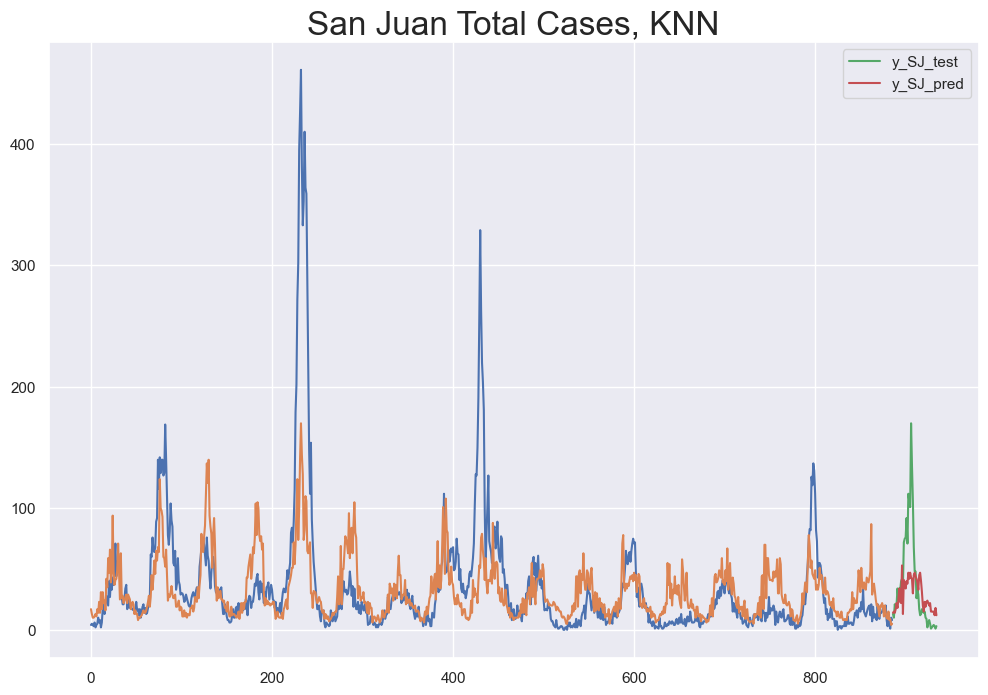

In [50]:
# plot SJ
plt.figure(figsize=(12,8))
plt.plot(y_SJ_train)
plt.plot(y_pred_train_SJ)

series_SJ = pd.Series(y_pred_test_SJ, index = y_SJ_test.index) 

plt.plot(y_SJ_test, label ="y_SJ_test")
plt.plot(series_SJ, label ="y_SJ_pred")
plt.title("San Juan Total Cases, KNN", font = {'size'   : 24})
plt.legend()

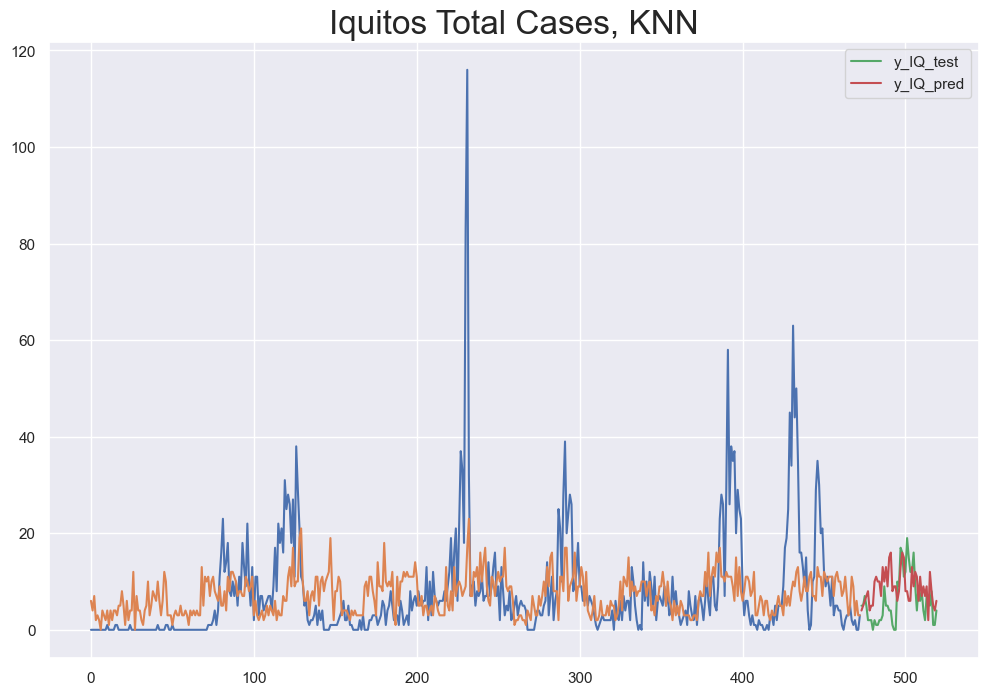

In [51]:
# plot IQ
plt.figure(figsize=(12,8))
plt.plot(y_IQ_train)
plt.plot(y_pred_train_IQ)

series_IQ = pd.Series(y_pred_test_IQ, index = y_IQ_test.index) 

plt.plot(y_IQ_test, label ="y_IQ_test")
plt.plot(series_IQ, label ="y_IQ_pred")
plt.title("Iquitos Total Cases, KNN", font = {'size'   : 24})
plt.legend()


#print("Mean Abs Value for DecisionTreeRegressor: {:.3f}".format(eval_measures.meanabs(y_pred_test, y_SJ_test)))

### XGBoost is a reference regressor here, which is known by its effeciency and perfomance

#### using gradient boost will allow us to distinguish weather condition more precisely, because regressor will automatically select features that gave us more information, althought this regressor cannot see dependencies between neighbors

## XGBoost

We will look for standart parametres of gradient boosting tree such as max_depth, n_estimators. 

In [52]:
from xgboost import XGBRegressor

In [53]:
grid = {
        'max_depth': range (1, 5, 1),
        'n_estimators': range(8, 100, 4),
        'learning_rate': [0.1, 0.01, 0.05],
       }

XGBoost_SJ = XGBRegressor()

gs_SJ = GridSearchCV(XGBoost_SJ, param_grid=grid, scoring = 'neg_mean_absolute_error',  n_jobs = -1)
gs_SJ.fit(X_SJ_train, y_SJ_train)

y_pred_train_SJ = gs_SJ.predict(X_SJ_train).astype(int)
y_pred_test_SJ = gs_SJ.predict(X_SJ_test).astype(int)

XGBoost_IQ = XGBRegressor()

gs_IQ = GridSearchCV(XGBoost_IQ, param_grid=grid, scoring = 'neg_mean_absolute_error', n_jobs = -1)
gs_IQ.fit(X_IQ_train, y_IQ_train)

y_pred_train_IQ = gs_IQ.predict(X_IQ_train).astype(int)
y_pred_test_IQ = gs_IQ.predict(X_IQ_test).astype(int)

print("tuned hyperparameters for SJ :(best parameters) ",gs_SJ.best_params_)
print("Mean Abs Value for XGBoost_SJ: {:.3f}".format(eval_measures.meanabs(y_pred_test_SJ, y_SJ_test)))

print("tuned hyperparameters for IQ :(best parameters) ",gs_IQ.best_params_)
print("Mean Abs Value for XGBoost_IQ: {:.3f}".format(eval_measures.meanabs(y_pred_test_IQ, y_IQ_test)))

tuned hyperparameters for SJ :(best parameters)  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 96}
Mean Abs Value for XGBoost_SJ: 23.673
tuned hyperparameters for IQ :(best parameters)  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 76}
Mean Abs Value for XGBoost_IQ: 3.936


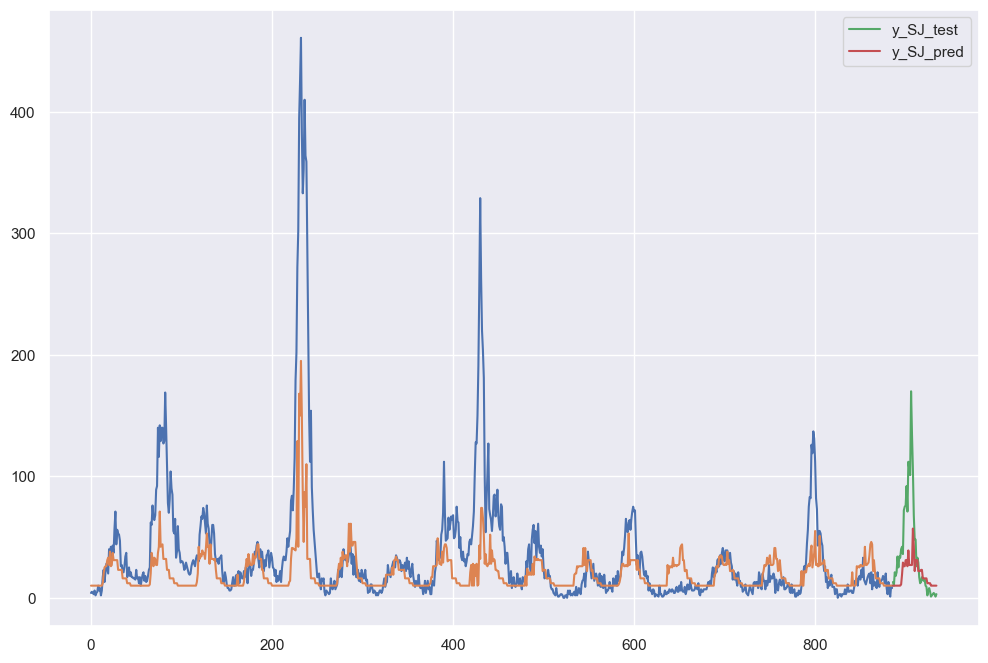

In [54]:
# plot SJ
plt.figure(figsize=(12,8))
plt.plot(y_SJ_train)
plt.plot(y_pred_train_SJ)

series_SJ = pd.Series(y_pred_test_SJ, index = y_SJ_test.index) 

plt.plot(y_SJ_test, label ="y_SJ_test")
plt.plot(series_SJ, label ="y_SJ_pred")
plt.legend()

Mean Abs Value for XGBoost_SJ: 23.673
Mean Abs Value for XGBoost_IQ: 3.936


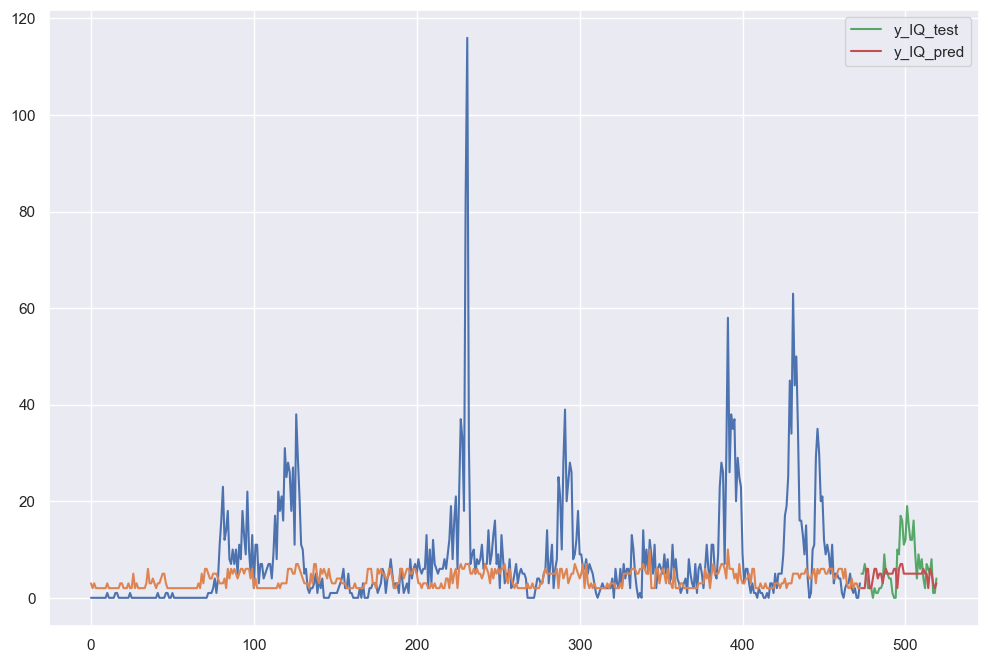

In [55]:
# plot IQ
plt.figure(figsize=(12,8))
plt.plot(y_IQ_train)
plt.plot(y_pred_train_IQ)

series_IQ = pd.Series(y_pred_test_IQ, index = y_IQ_test.index) 

plt.plot(y_IQ_test, label ="y_IQ_test")
plt.plot(series_IQ, label ="y_IQ_pred")
plt.legend()

print("Mean Abs Value for XGBoost_SJ: {:.3f}".format(eval_measures.meanabs(y_pred_test_SJ, y_SJ_test)))
print("Mean Abs Value for XGBoost_IQ: {:.3f}".format(eval_measures.meanabs(y_pred_test_IQ, y_IQ_test)))

### Try to use delayed data for Iquitos and larger test_split

In [56]:
IQ_shift = X_train.loc[936 : ]

In [57]:
IQ_shift.index -= 936

In [58]:
IQ_shift.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)

C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\352828044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IQ_shift.drop(['Iquitos', 'San_Juan'], axis = 1, inplace = True)


In [59]:
Iquitos_Corr_Shift.query("total_cases >= 0.15").index

Index(['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c',
       'total_cases', 'Breeding_days'],
      dtype='object')

In [60]:
shift = 3 # delay 2 weeks
num_features_IQ_shift = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c',
       'Breeding_days']

X_IQ_Shift = IQ_shift[num_features_IQ_shift].iloc[shift:]
#X_IQ_Shift = IQ_shift[num_features_IQ_shift]

In [61]:
X_IQ_Shift.reset_index(drop = True, inplace = True)
#X_IQ_Shift.drop('index', axis =1, inplace = True)

In [62]:
Y_IQ_shift = IQ_shift["total_cases"].iloc[shift:]

In [63]:
Y_IQ_shift.reset_index(drop = True, inplace = True)

In [64]:
tscv_IQ = TimeSeriesSplit(2)

for train_index, test_index in tscv_IQ.split(X_IQ_Shift):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_IQ_train, X_IQ_test = X_IQ_Shift.iloc[train_index], X_IQ_Shift.iloc[test_index]
    y_IQ_train, y_IQ_test = Y_IQ_shift.iloc[train_index], Y_IQ_shift.iloc[test_index]
    
scaler = MinMaxScaler()

scaler.fit(X_IQ_train[num_features_IQ_shift])

X_IQ_train[num_features_IQ_shift] = scaler.transform(X_IQ_train[num_features_IQ_shift])
X_IQ_test[num_features_IQ_shift] = scaler.transform(X_IQ_test[num_features_IQ_shift])

C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\1595424260.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_IQ_train[num_features_IQ_shift] = scaler.transform(X_IQ_train[num_features_IQ_shift])
C:\Users\Кокшаров\AppData\Local\Temp\ipykernel_20948\1595424260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_IQ_test[num_features_IQ_shift] = scaler.transform(X_IQ_test[num_features_IQ_shift])


In [65]:
grid_KNN = {
        'n_neighbors':np.arange(1,20,1),
        'weights': ['uniform', 'distance'],
}


KNN_IQ = KNeighborsRegressor()

gs_IQ = GridSearchCV(KNN_IQ, param_grid=grid_KNN, scoring = 'neg_mean_absolute_error')
gs_IQ.fit(X_IQ_train, y_IQ_train)

y_pred_train_IQ = gs_IQ.predict(X_IQ_train).astype(int)
y_pred_test_IQ = gs_IQ.predict(X_IQ_test).astype(int)

print("tuned hyperparameters for IQ :(best parameters) ",gs_IQ.best_params_)
print("Mean Abs Value for DecisionTreeRegressor_IQ: {:.3f}".format(metrics.mean_absolute_error(y_pred_test_IQ, y_IQ_test)))

tuned hyperparameters for IQ :(best parameters)  {'n_neighbors': 11, 'weights': 'uniform'}
Mean Abs Value for DecisionTreeRegressor_IQ: 7.413


Mean Abs Value for KNN_IQ: 7.413


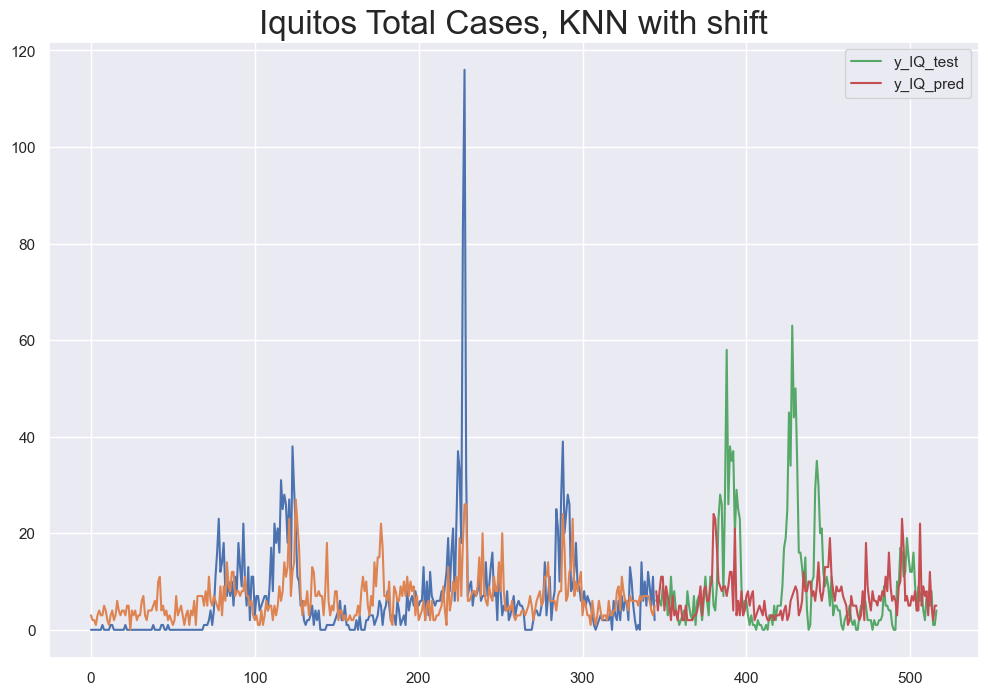

In [66]:
# plot IQ
plt.figure(figsize=(12,8))
plt.plot(y_IQ_train)
plt.plot(y_pred_train_IQ)

series_IQ = pd.Series(y_pred_test_IQ, index = y_IQ_test.index) 

plt.plot(y_IQ_test, label ="y_IQ_test")
plt.plot(series_IQ, label ="y_IQ_pred")
plt.title("Iquitos Total Cases, KNN with shift", font = {'size'   : 24})
plt.legend()

print("Mean Abs Value for KNN_IQ: {:.3f}".format(eval_measures.meanabs(y_pred_test_IQ, y_IQ_test)))

In [67]:
grid = {
        'max_depth': range (1, 5, 1),
        'n_estimators': range(8, 100, 4),
        'learning_rate': [0.1, 0.01, 0.05],
       }


gs_IQ = GridSearchCV(XGBoost_IQ, param_grid=grid, scoring = 'neg_mean_absolute_error', n_jobs = -1)
gs_IQ.fit(X_IQ_train, y_IQ_train)

y_pred_train_IQ = gs_IQ.predict(X_IQ_train).astype(int)
y_pred_test_IQ = gs_IQ.predict(X_IQ_test).astype(int)

print("tuned hyperparameters for IQ :(best parameters) ",gs_IQ.best_params_)
print("Mean Abs Value for XGBoost_IQ: {:.3f}".format(eval_measures.meanabs(y_pred_test_IQ, y_IQ_test)))

tuned hyperparameters for IQ :(best parameters)  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 60}
Mean Abs Value for XGBoost_IQ: 7.233


Mean Abs Value for XGBoost_SJ: 23.673
Mean Abs Value for XGBoost_IQ: 7.233


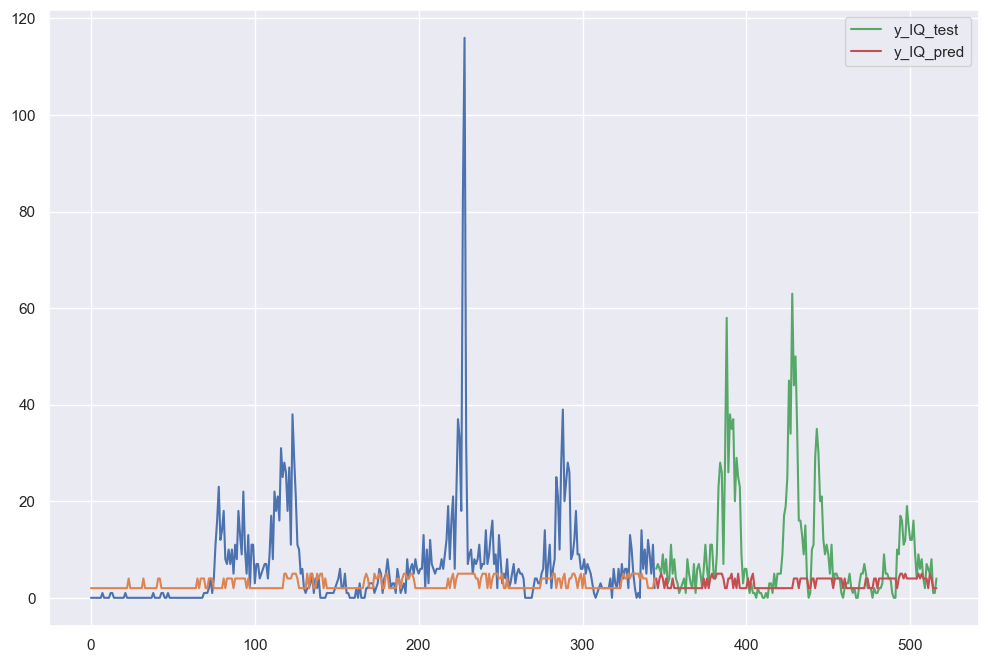

In [68]:
# plot IQ
plt.figure(figsize=(12,8))
plt.plot(y_IQ_train)
plt.plot(y_pred_train_IQ)

series_IQ = pd.Series(y_pred_test_IQ, index = y_IQ_test.index) 

plt.plot(y_IQ_test, label ="y_IQ_test")
plt.plot(series_IQ, label ="y_IQ_pred")
plt.legend()

print("Mean Abs Value for XGBoost_SJ: {:.3f}".format(eval_measures.meanabs(y_pred_test_SJ, y_SJ_test)))
print("Mean Abs Value for XGBoost_IQ: {:.3f}".format(eval_measures.meanabs(y_pred_test_IQ, y_IQ_test)))

## Analisys

#### At first let analise models for Sun Juan:
    Model (KNN) understands seasons changing and predict epidemic for each year, hovever, for some years it predicts outbreaks, but it didn't happen

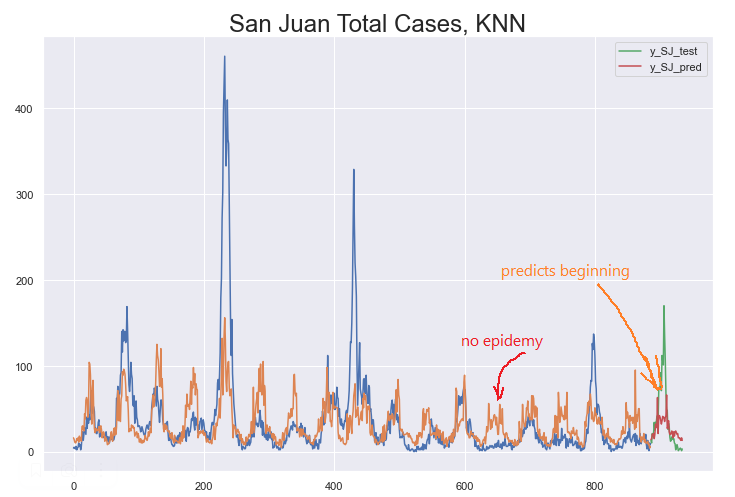

    Althought model rarely can predict maximum value of total_cases, but it can detects incresing of its value, which means that for San Juan can predicts disease outbreaks, especially the begenning (time stamp when number of cases starts to grown rapidly). This means that for San Juan model solve the initial problem

# Iquitos!

    This is much more complicated case
    
    At first, we can observe that for approximately 80 first entry point we see very low total_cases. We suggest that XGboost performs because of this. Also delay of climat impact take place. If we take this delay into accaunt we will have model (KNN) that can barely predict pandemic, better than nothing. Speaking about using this model it seems that it could correctly make predictions onle each two years
    
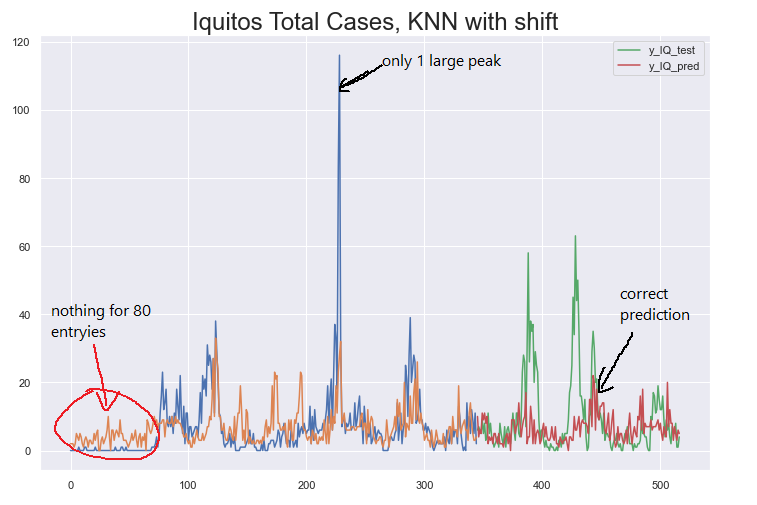    